# Large scale plots

In [6]:
import os
import pandas as pd
import matplotlib. pyplot as plt
from wordcloud import WordCloud

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)  # Defuault: (6, 4)
plt.rcParams['figure.dpi'] = 300

In [2]:
papers_df = pd.read_csv(os.path.join("data", "review_176995_20220502220126.csv"))
papers_df.drop("Comments (enter 'N/A' if none)", axis=1, inplace=True)

Questions:
 - How many datasets ?
 - Datasets used VS year ?

In [3]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 41 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Covidence #                                                75 non-null     int64 
 1   Study ID                                                   74 non-null     object
 2   Title                                                      75 non-null     object
 3   Reviewer Name                                              75 non-null     object
 4   Title.1                                                    75 non-null     object
 5   Year of publication                                        75 non-null     int64 
 6   Funding source                                             75 non-null     object
 7   Supervised learning                                        75 non-null     bool  
 8   Unsupervised learning 

## Automatic analysis

In [7]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(papers_df, title="Automatic Profiling Report")
# profile.to_file(os.path.join("out", "automatic_report.html"))

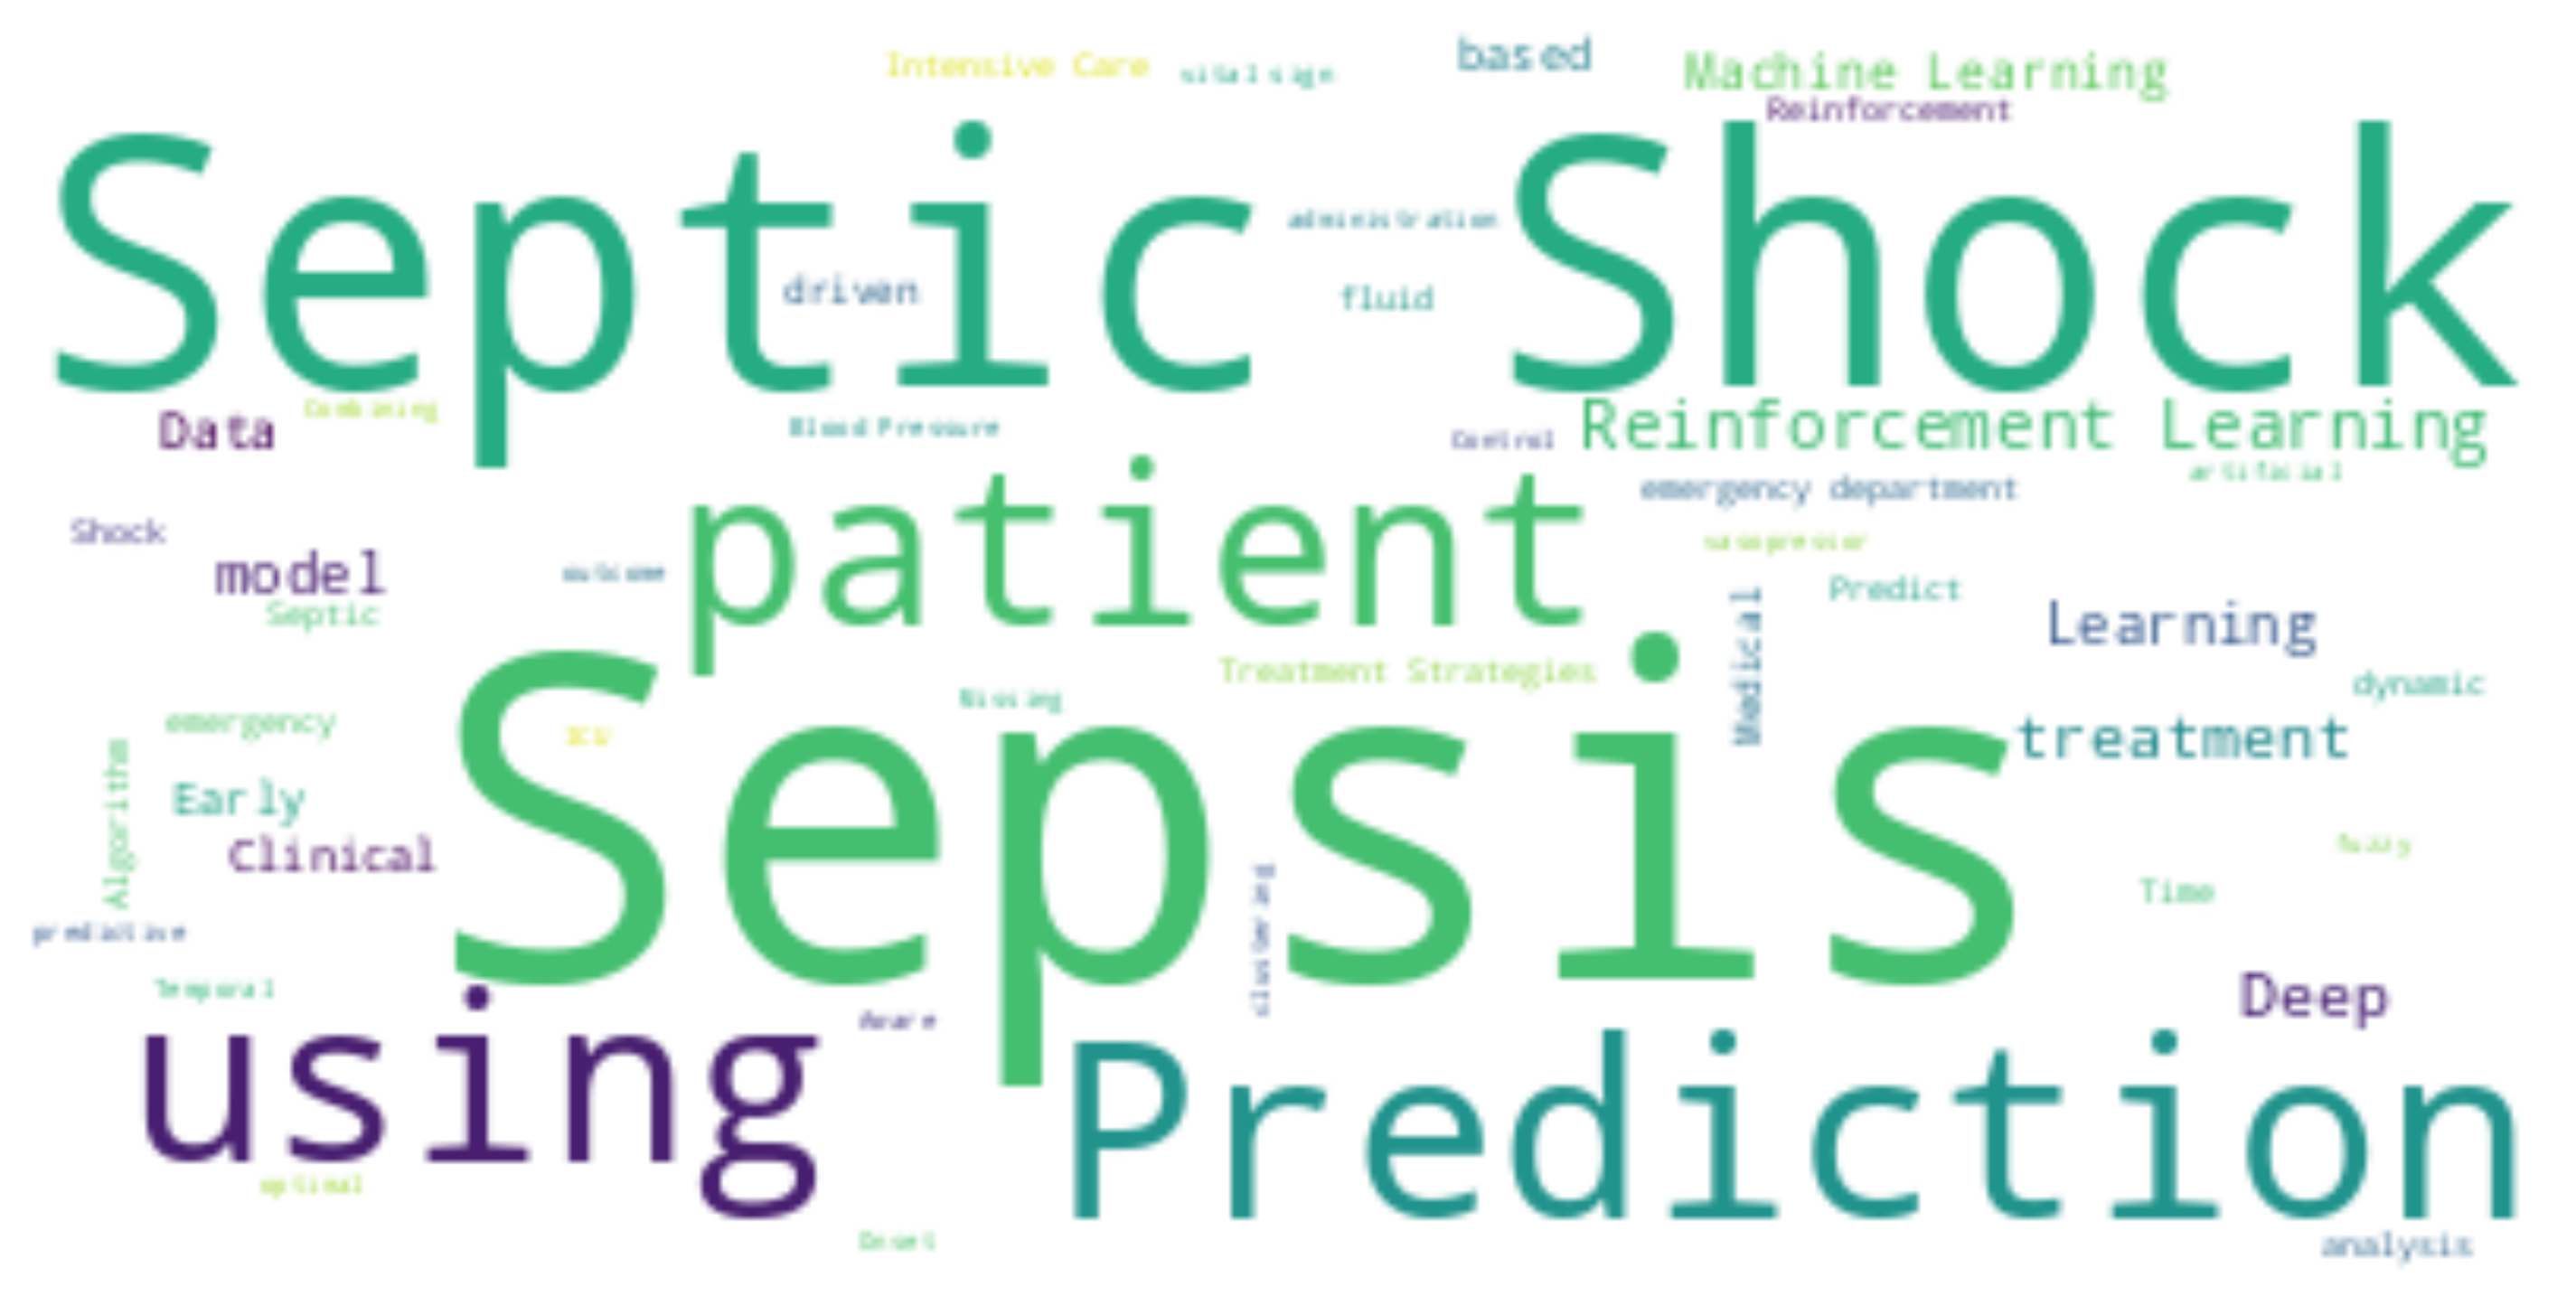

In [8]:
wordcloud = WordCloud(
    background_color="white",
).generate(papers_df["Title"].str.cat())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Funding soueces

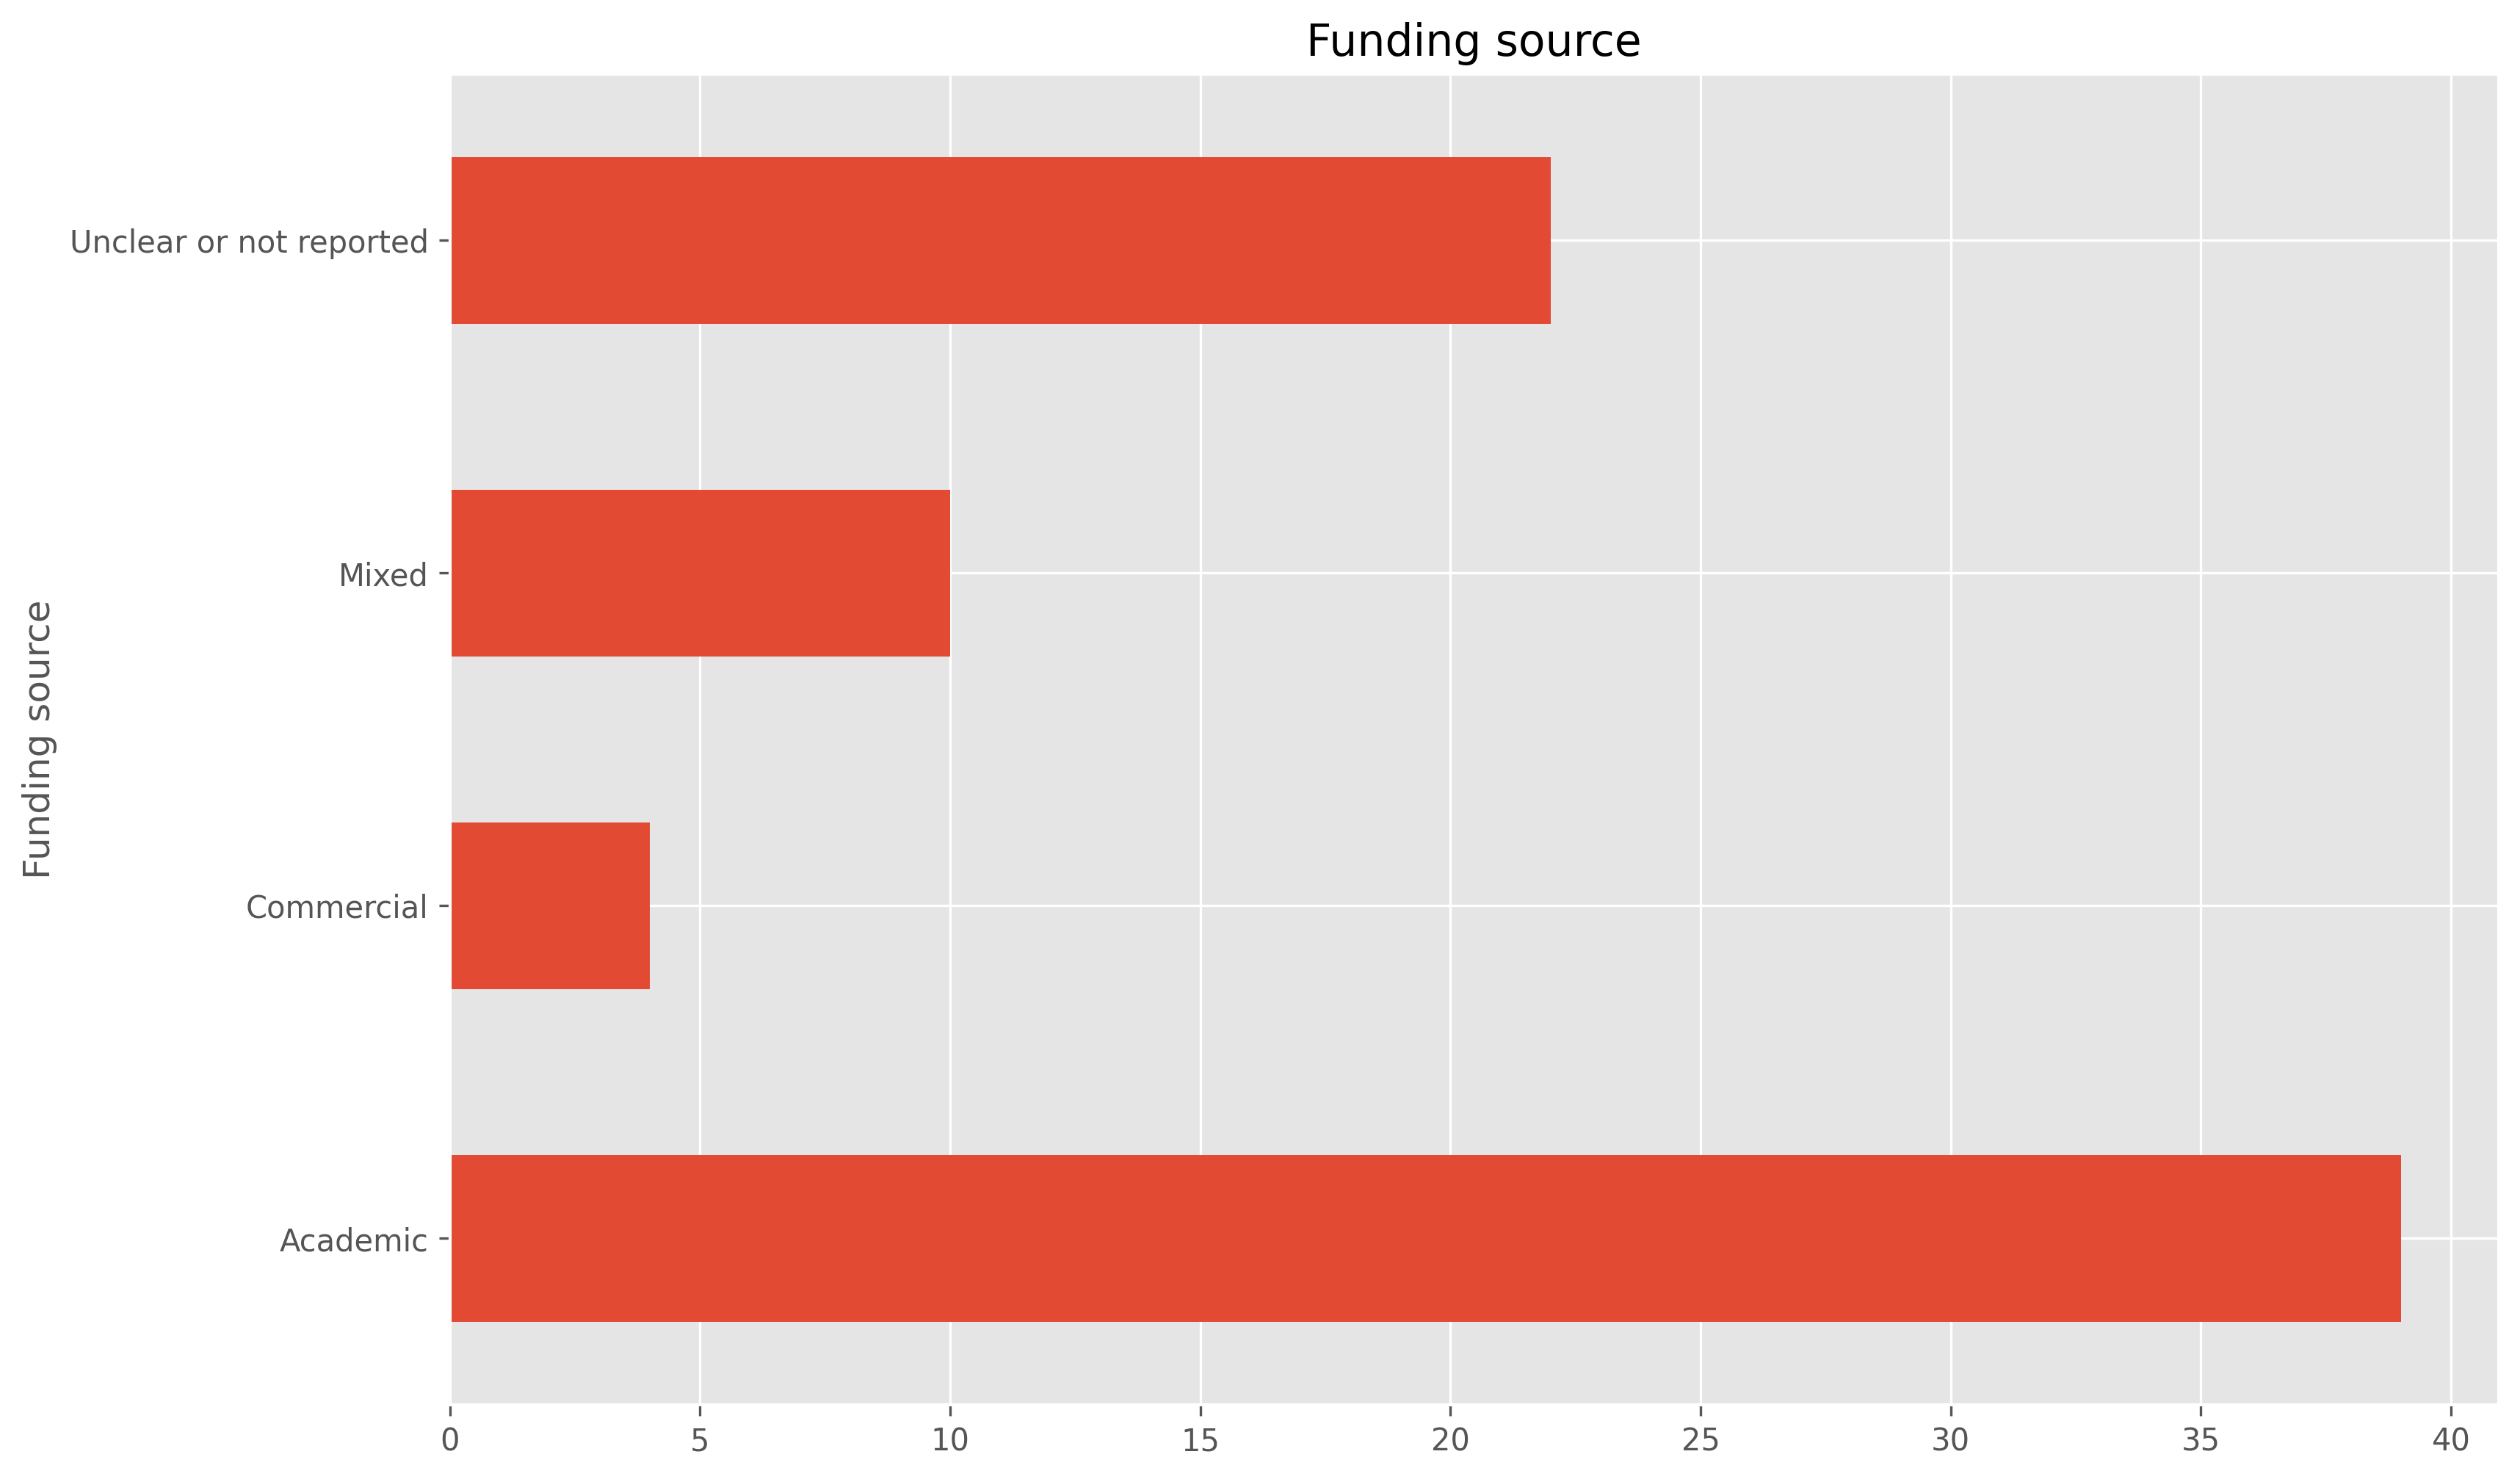

In [9]:
papers_df.groupby("Funding source")["Title"].count().plot.barh()
plt.title("Funding source")
plt.savefig(os.path.join("out", f"Funding - pie.png"))
plt.show()

In [10]:
fundong_source_df = papers_df.groupby("Funding source")["Title"].count()
fundong_source_df / fundong_source_df.sum() * 100

Funding source
Academic                   52.000000
Commercial                  5.333333
Mixed                      13.333333
Unclear or not reported    29.333333
Name: Title, dtype: float64

Funding source over the years:

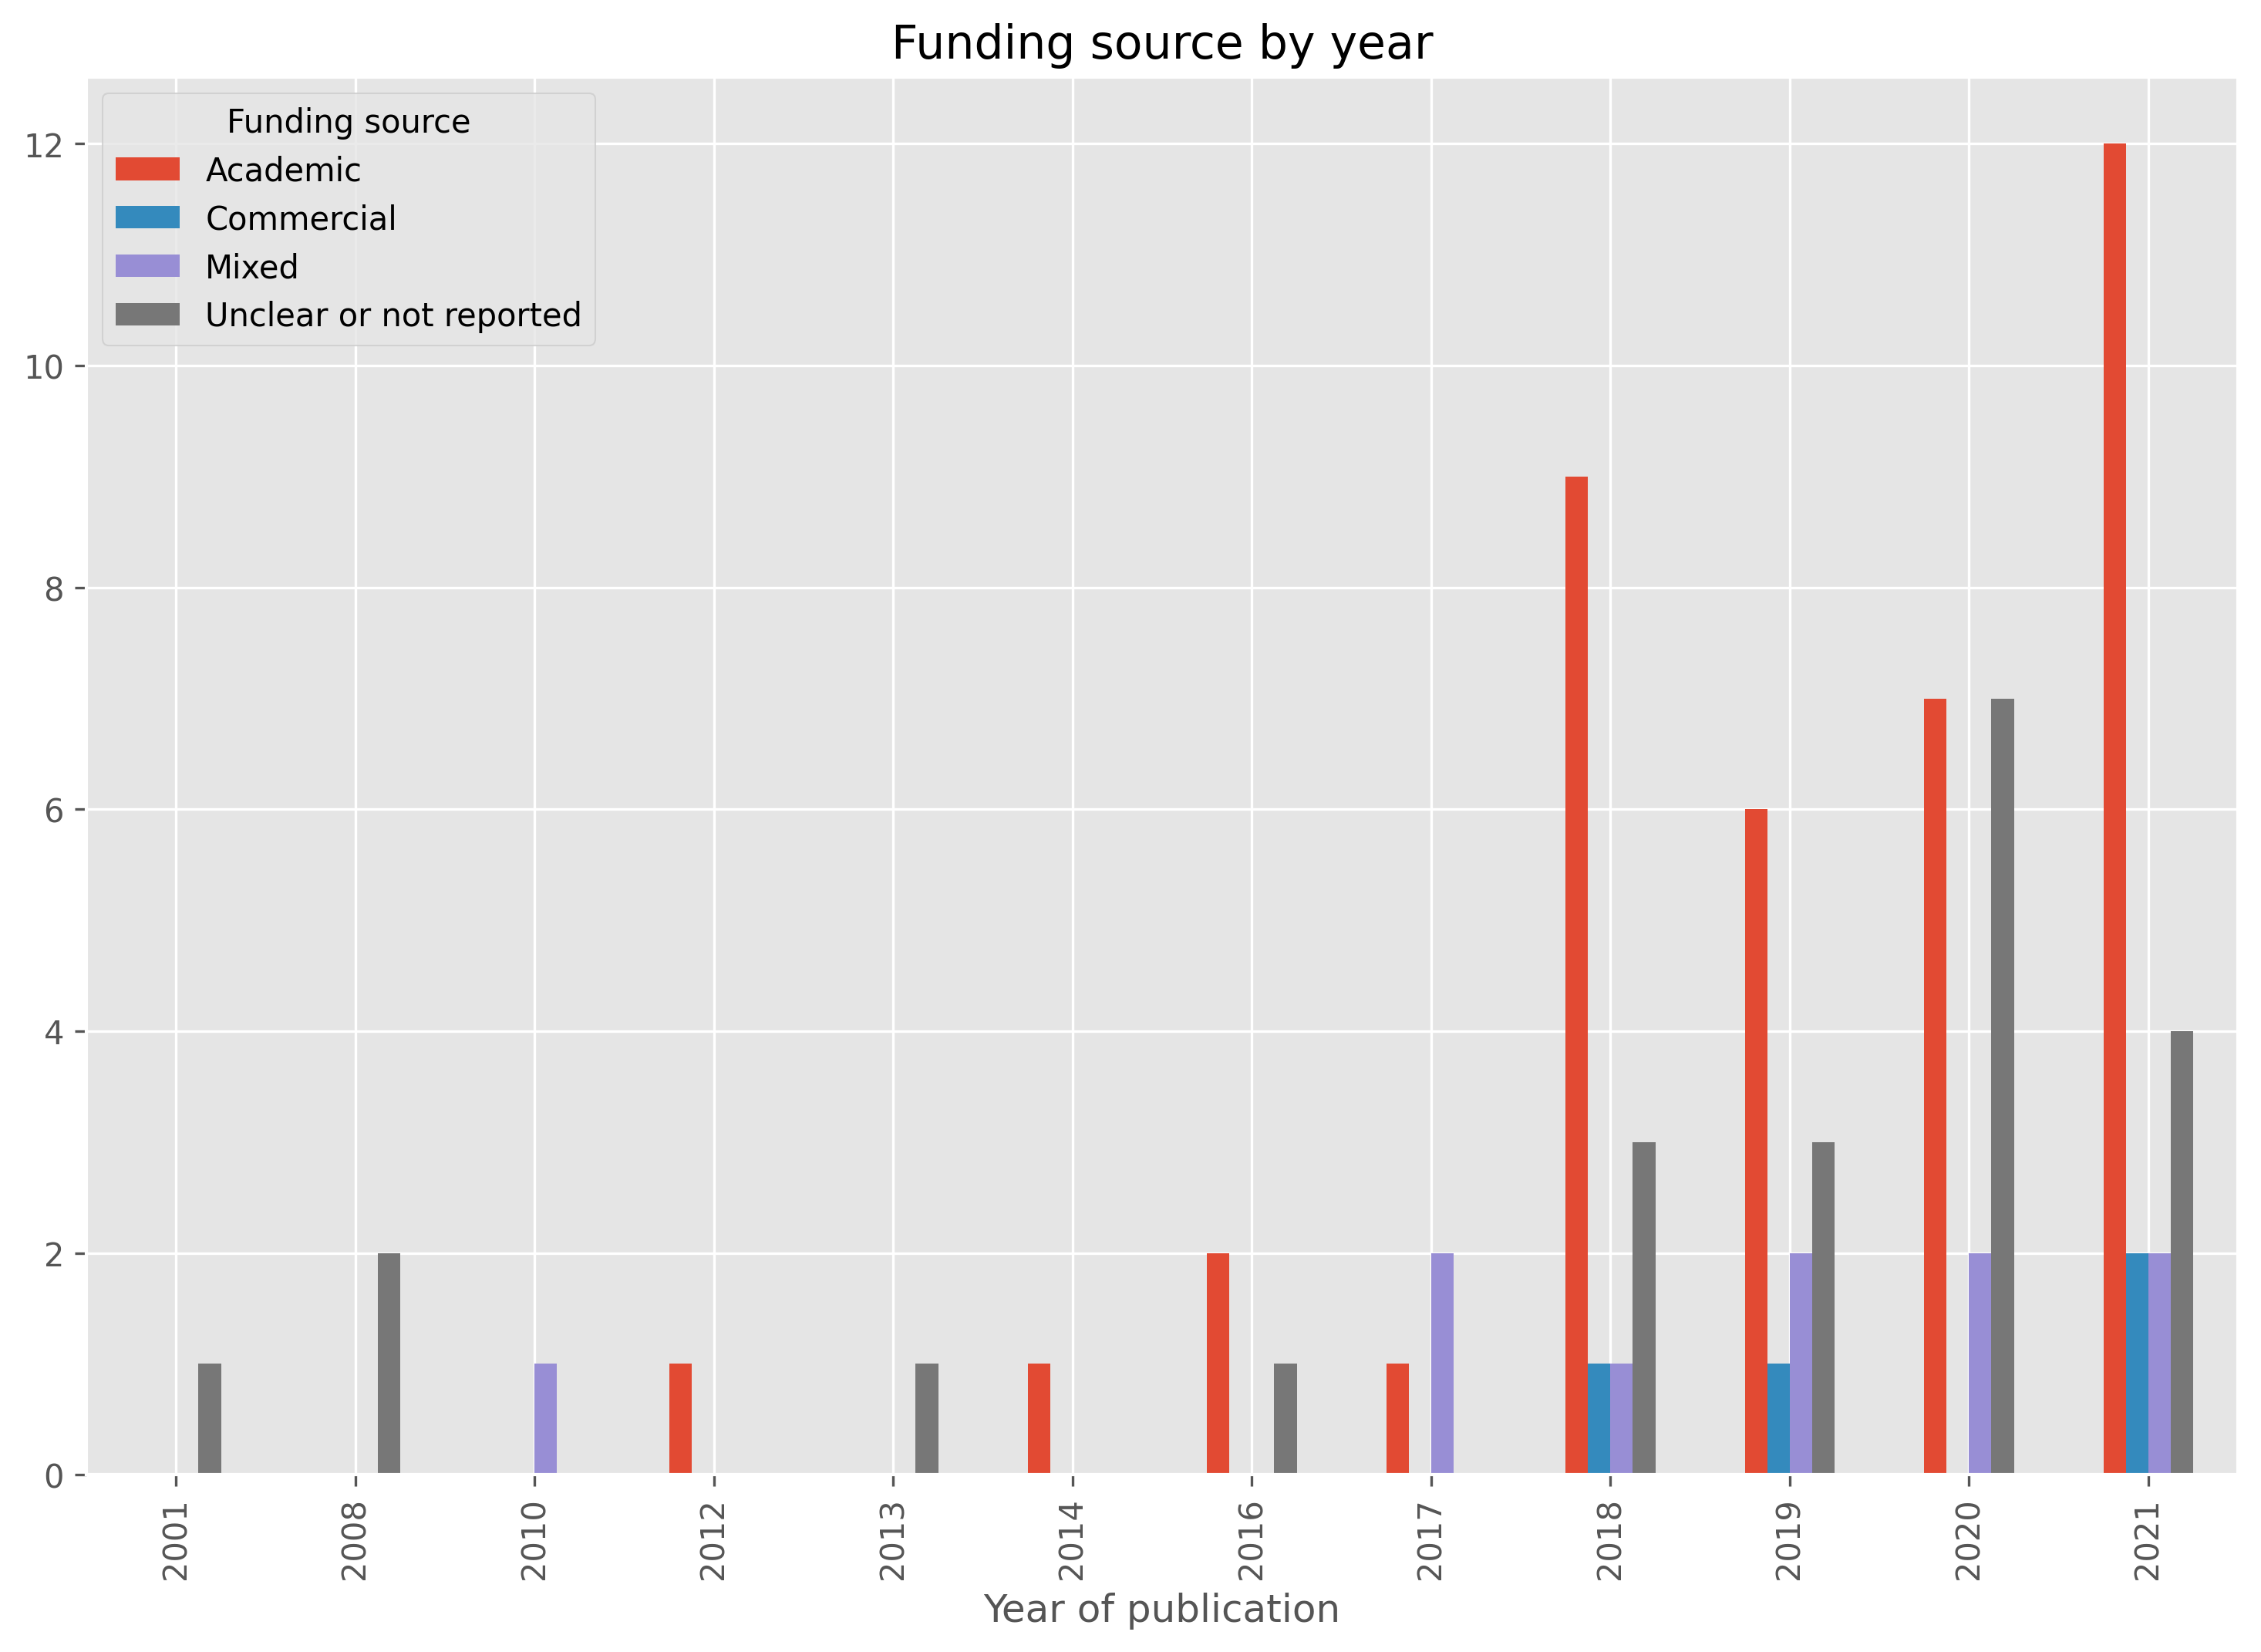

In [11]:
pd.crosstab(papers_df["Year of publication"], papers_df["Funding source"]).plot.bar()
plt.title("Funding source by year")
plt.savefig(os.path.join("out", f"Funding - VS time.png"))
plt.show()

Observations:
 - Overall, 29.3% of the extracted papers have an unclear or unspecified funding source
 - Most papers benefit from academoic funding, but mixed and industry funded papers seem to be on the rise

## Extent of validation

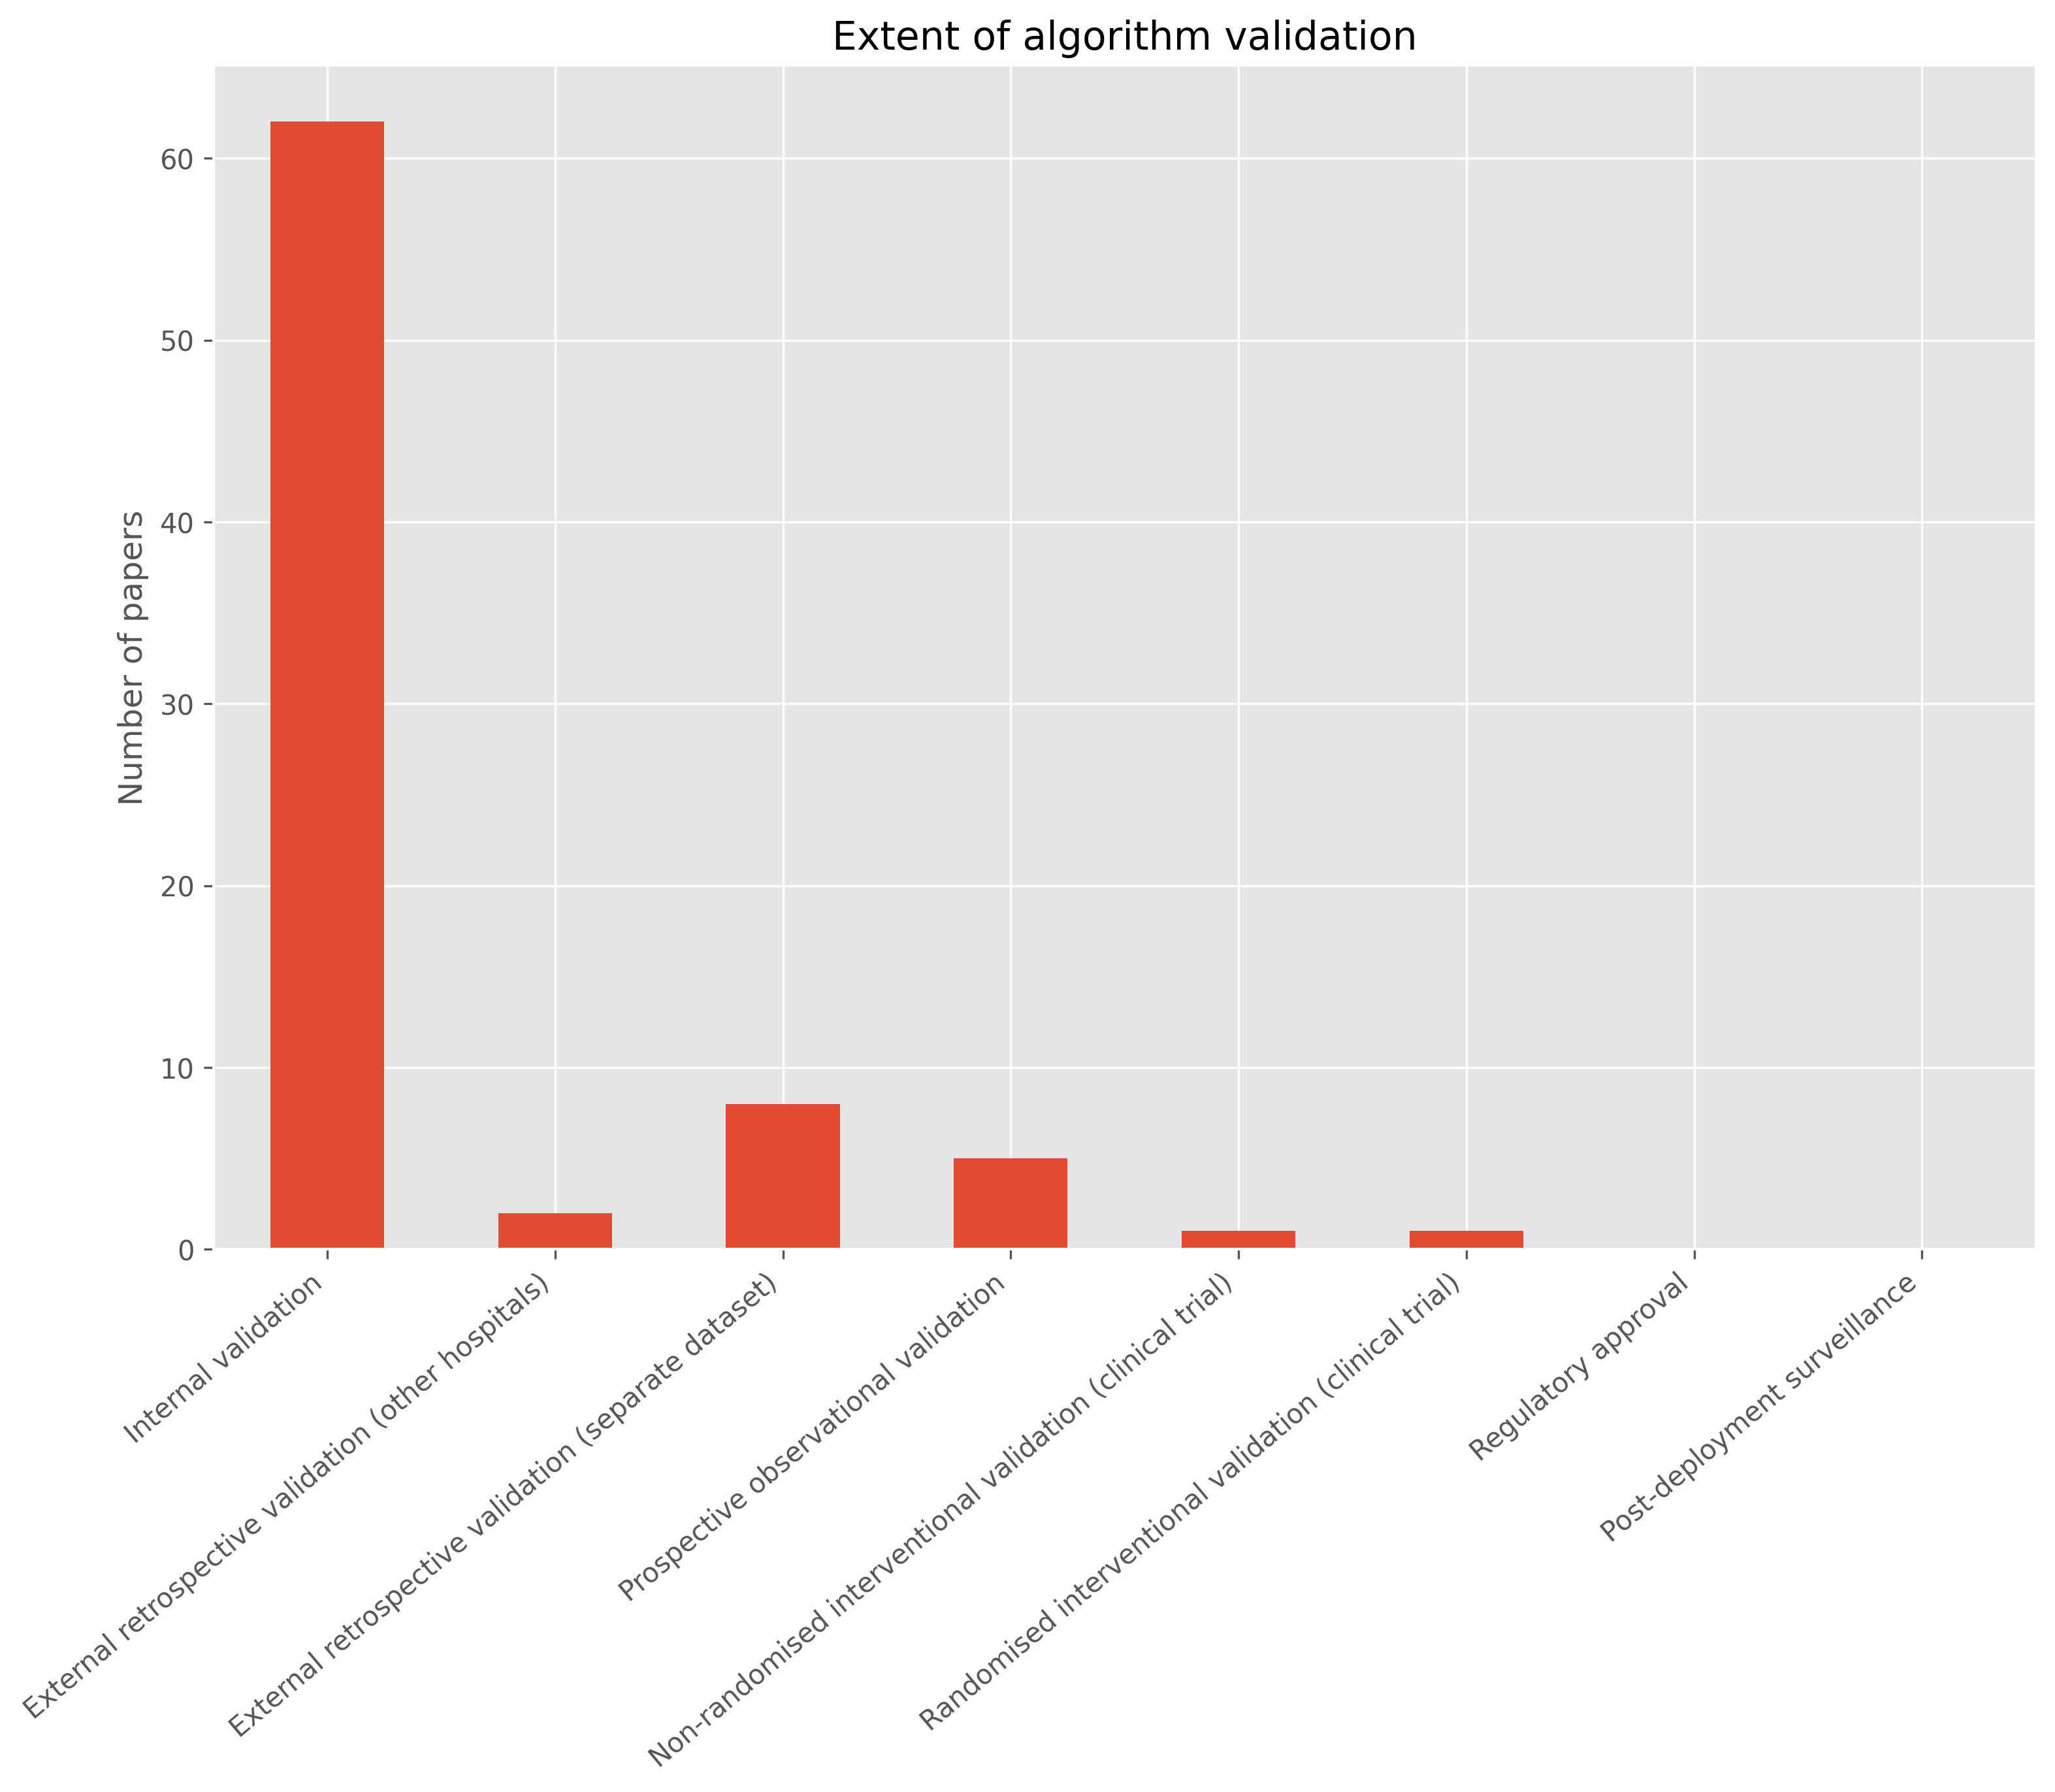

In [12]:
validation_stages = [
    "Internal validation",
    "External retrospective validation (other hospitals)",
    "External retrospective validation (separate dataset)",
    "Prospective observational validation",
    "Non-randomised interventional validation (clinical trial)",
    "Randomised interventional validation (clinical trial)",
    "Regulatory approval",
    "Post-deployment surveillance"
]
papers_df[validation_stages].sum().plot.bar()
plt.title("Extent of algorithm validation")
plt.ylabel("Number of papers")
plt.xticks(list(range(len(validation_stages))), validation_stages, rotation=40, ha="right")
plt.savefig(os.path.join("out", f"Validation stage - bar.png"))
plt.show()

## Sepsis definition

In [13]:
papers_df.columns

Index(['Covidence #', 'Study ID', 'Title', 'Reviewer Name', 'Title.1',
       'Year of publication', 'Funding source', 'Supervised learning',
       'Unsupervised learning', 'Reinforcement learning',
       'Biological / physiological model', 'Algorithms used',
       'MIMIC (any version)', 'eICU Collaborative Research Database',
       'Private dataset / datasets', 'Other public dataset',
       'Name/names of other public dataset/datasets',
       'Number of hospitals is specified', 'Total number of hospitals',
       'Number of patient episodes is specified',
       'Total number of patient episodes', 'Non-temporal',
       'Temporal, non-waveform', 'Temporal, waveform',
       'Sepsis definition is specified', 'Defined using Sepsis-3',
       'Defined using Infection + SIRS ', 'Defined using clinical codes',
       'Defined using other criteria', 'Septic shock definition is specified',
       'Definition requires vasopressors / inotropes',
       'Definition requires initial fluid 

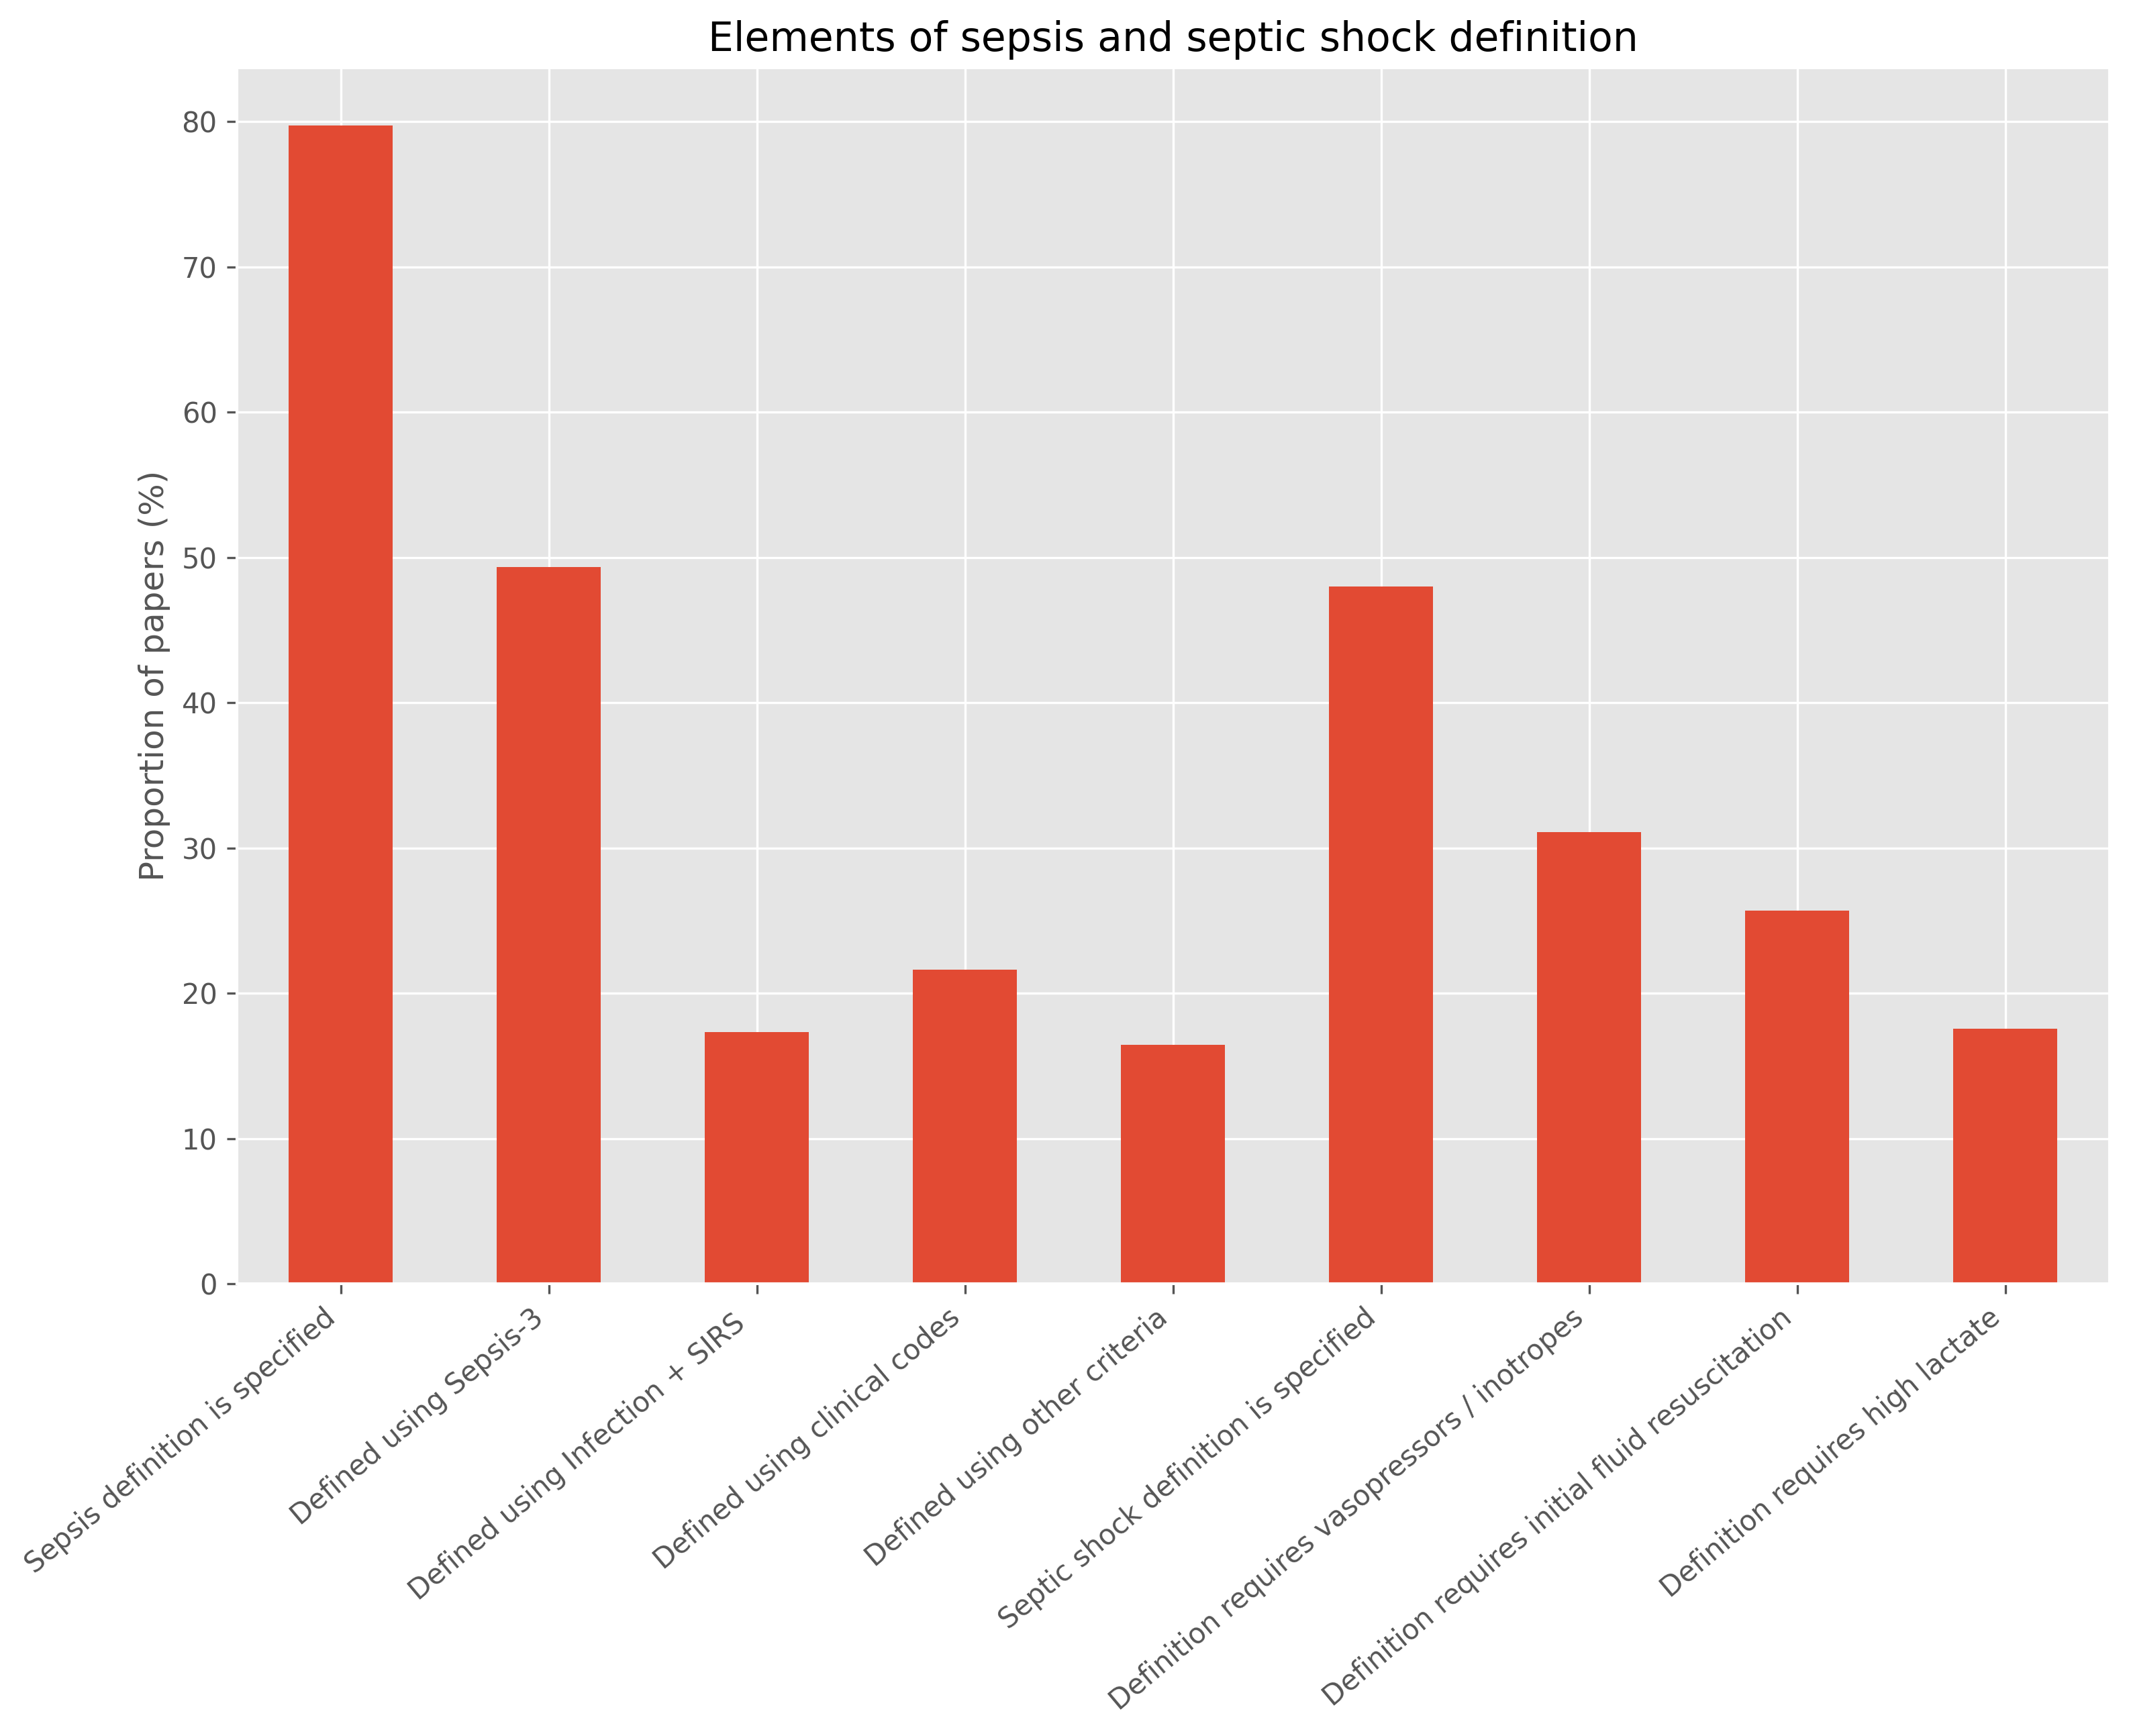

In [14]:
sepsis_definition_criterions = [
    "Sepsis definition is specified",
    "Defined using Sepsis-3",
    "Defined using Infection + SIRS ",
    "Defined using clinical codes",
    "Defined using other criteria",
    "Septic shock definition is specified",
    "Definition requires vasopressors / inotropes",
    "Definition requires initial fluid resuscitation",
    "Definition requires high lactate"
]
(100*papers_df[sepsis_definition_criterions].mean()).plot.bar()
plt.title("Elements of sepsis and septic shock definition")
plt.ylabel("Proportion of papers (%)")
plt.xticks(list(range(len(sepsis_definition_criterions))), sepsis_definition_criterions, rotation=40, ha="right")
plt.savefig(os.path.join("out", f"Sepsis definition - bar.png"))
plt.show()

## Source dataset

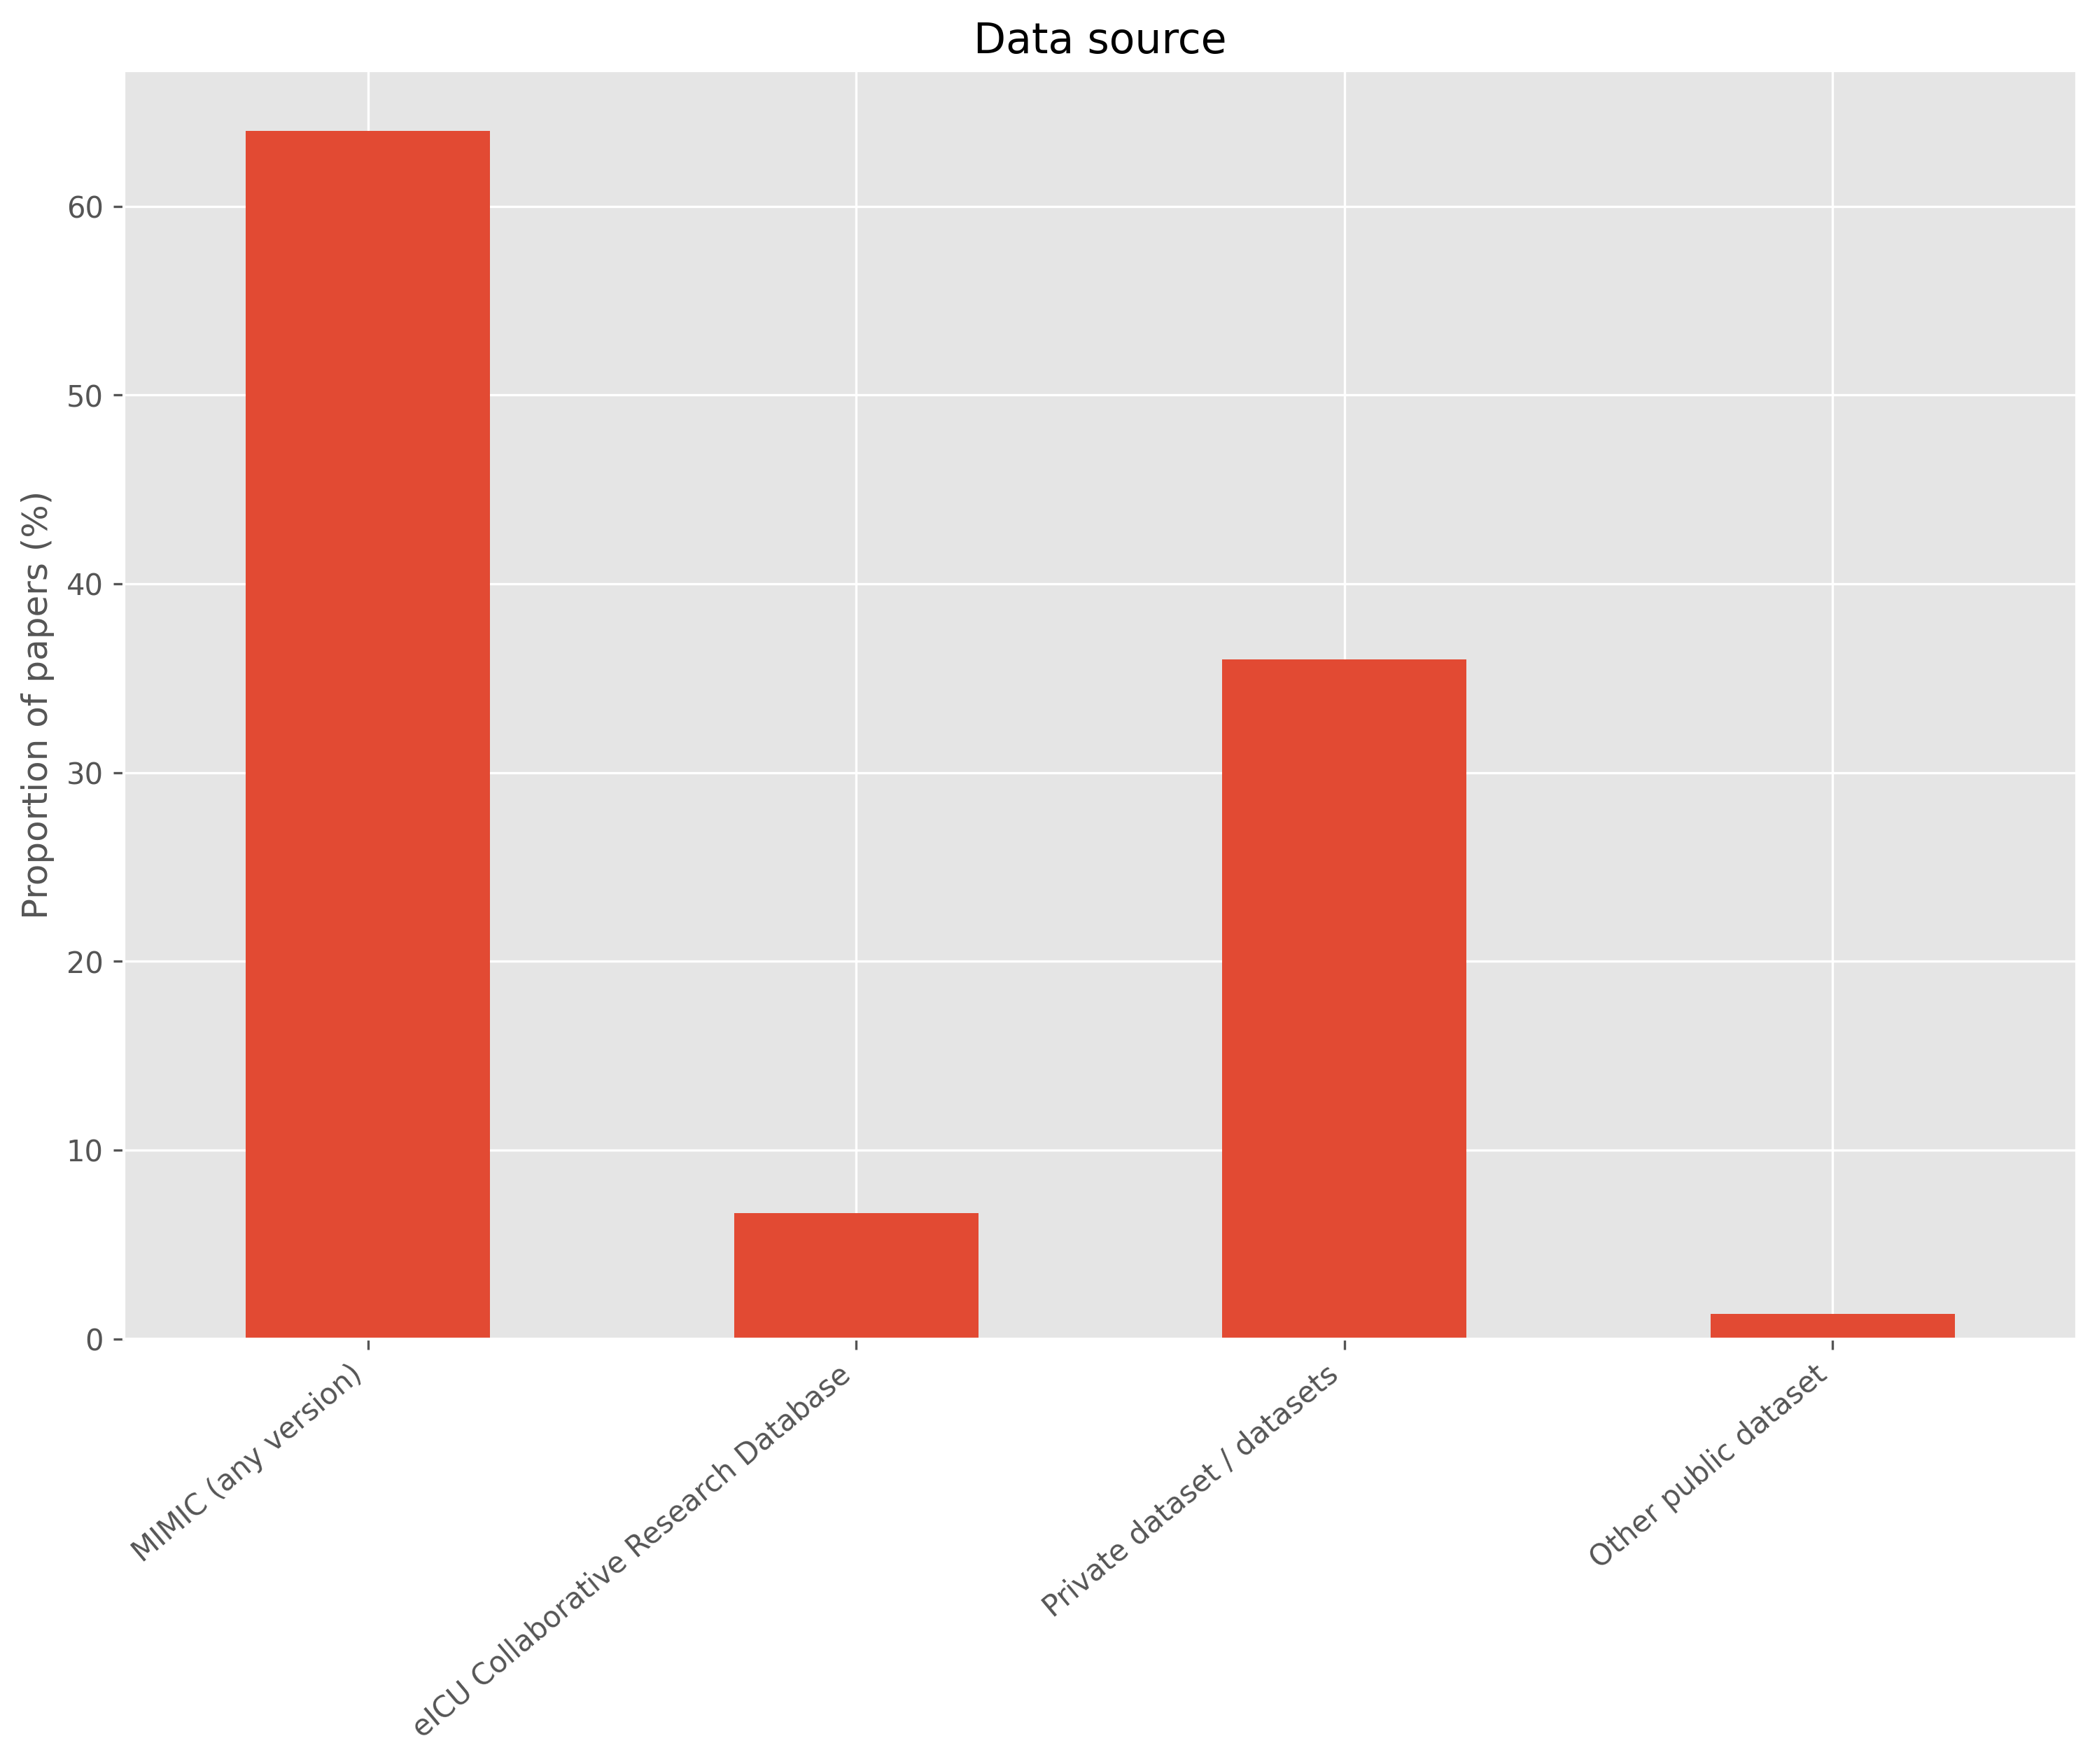

In [15]:
dataset_cols = [
    "MIMIC (any version)",
    "eICU Collaborative Research Database",
    "Private dataset / datasets",
    "Other public dataset"
]
(100*papers_df[dataset_cols].mean()).plot.bar()
plt.title("Data source")
plt.ylabel("Proportion of papers (%)")
plt.xticks(list(range(len(dataset_cols))), dataset_cols, rotation=40, ha="right")
plt.savefig(os.path.join("out", f"Database - bar.png"))
plt.show()

Proportion of papers that specified a number of episodes: 97.33333333333334


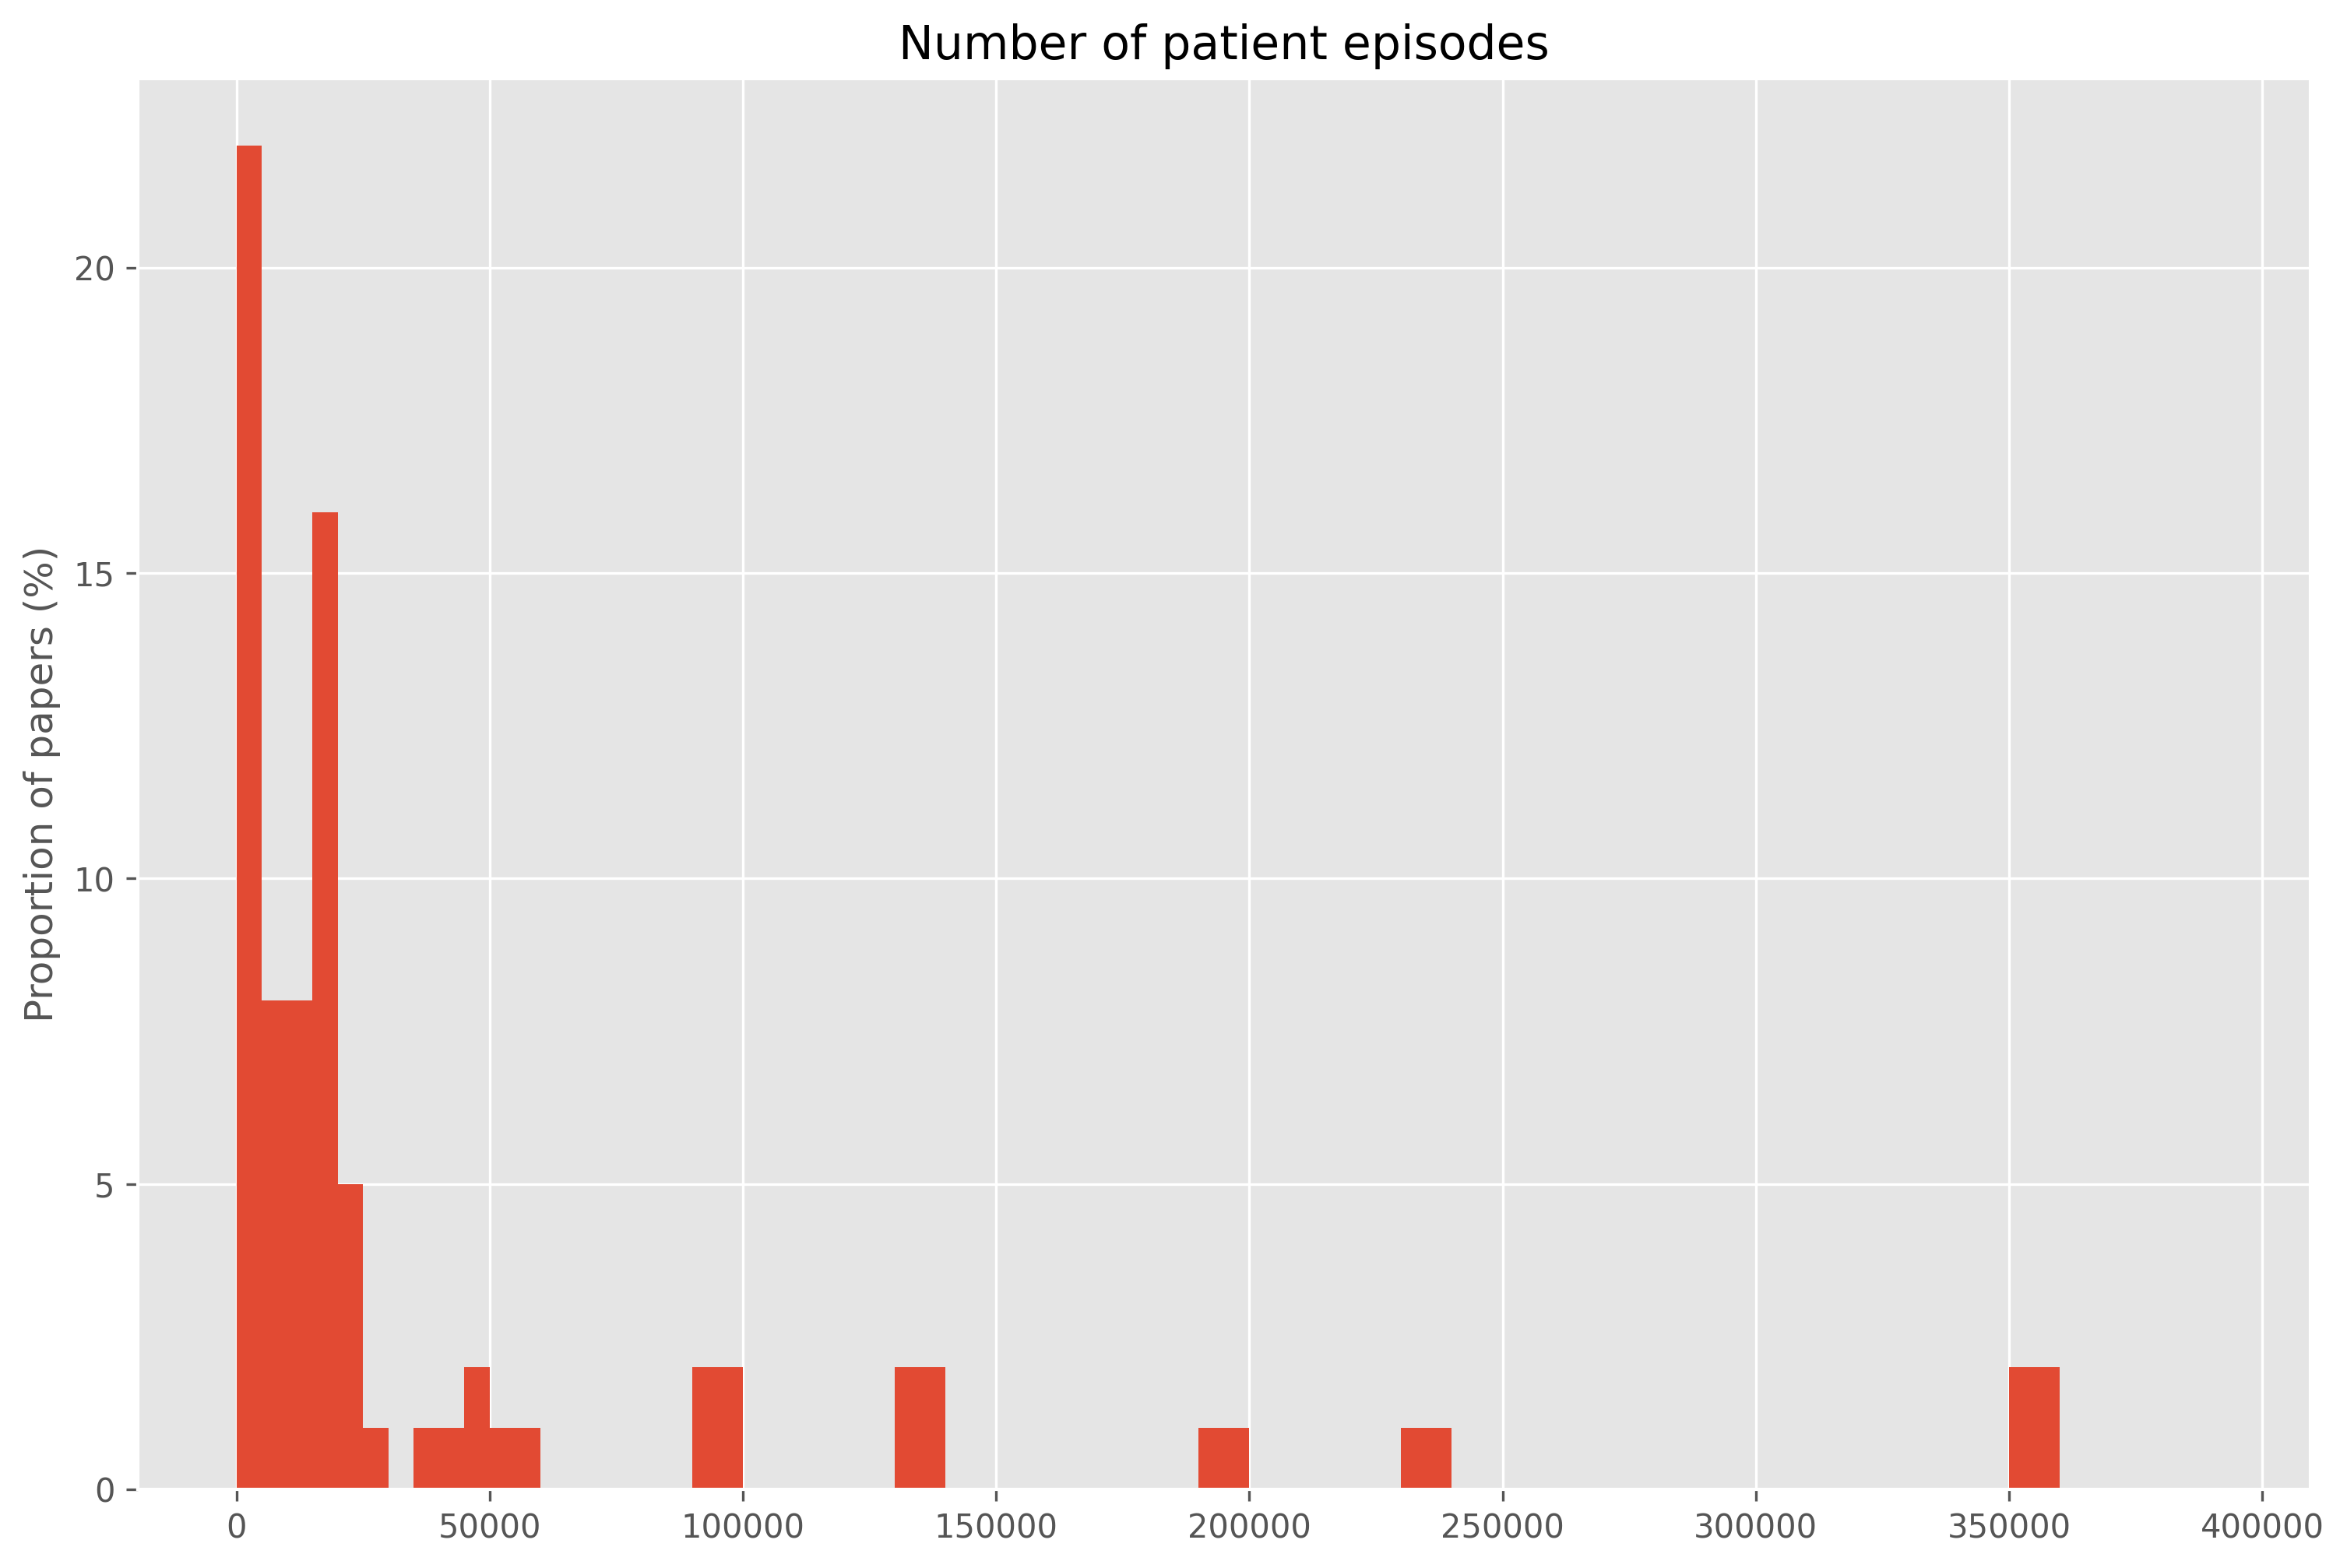

In [16]:
EPISODES_SPECIFIED = "Number of patient episodes is specified"
N_EPISODES = "Total number of patient episodes"
print("Proportion of papers that specified a number of episodes:", papers_df[EPISODES_SPECIFIED].mean() * 100)
bins = list(range(0, 50_000, 5_000)) + list(range(50_000, 400_000, 10_000))
papers_df[papers_df[EPISODES_SPECIFIED]][N_EPISODES].apply(lambda x: x.replace(",", "")).astype("int").hist(bins=bins)
plt.title("Number of patient episodes")
plt.ylabel("Proportion of papers (%)")
plt.savefig(os.path.join("out", f"Number of episodes - hist.png"))
plt.show()

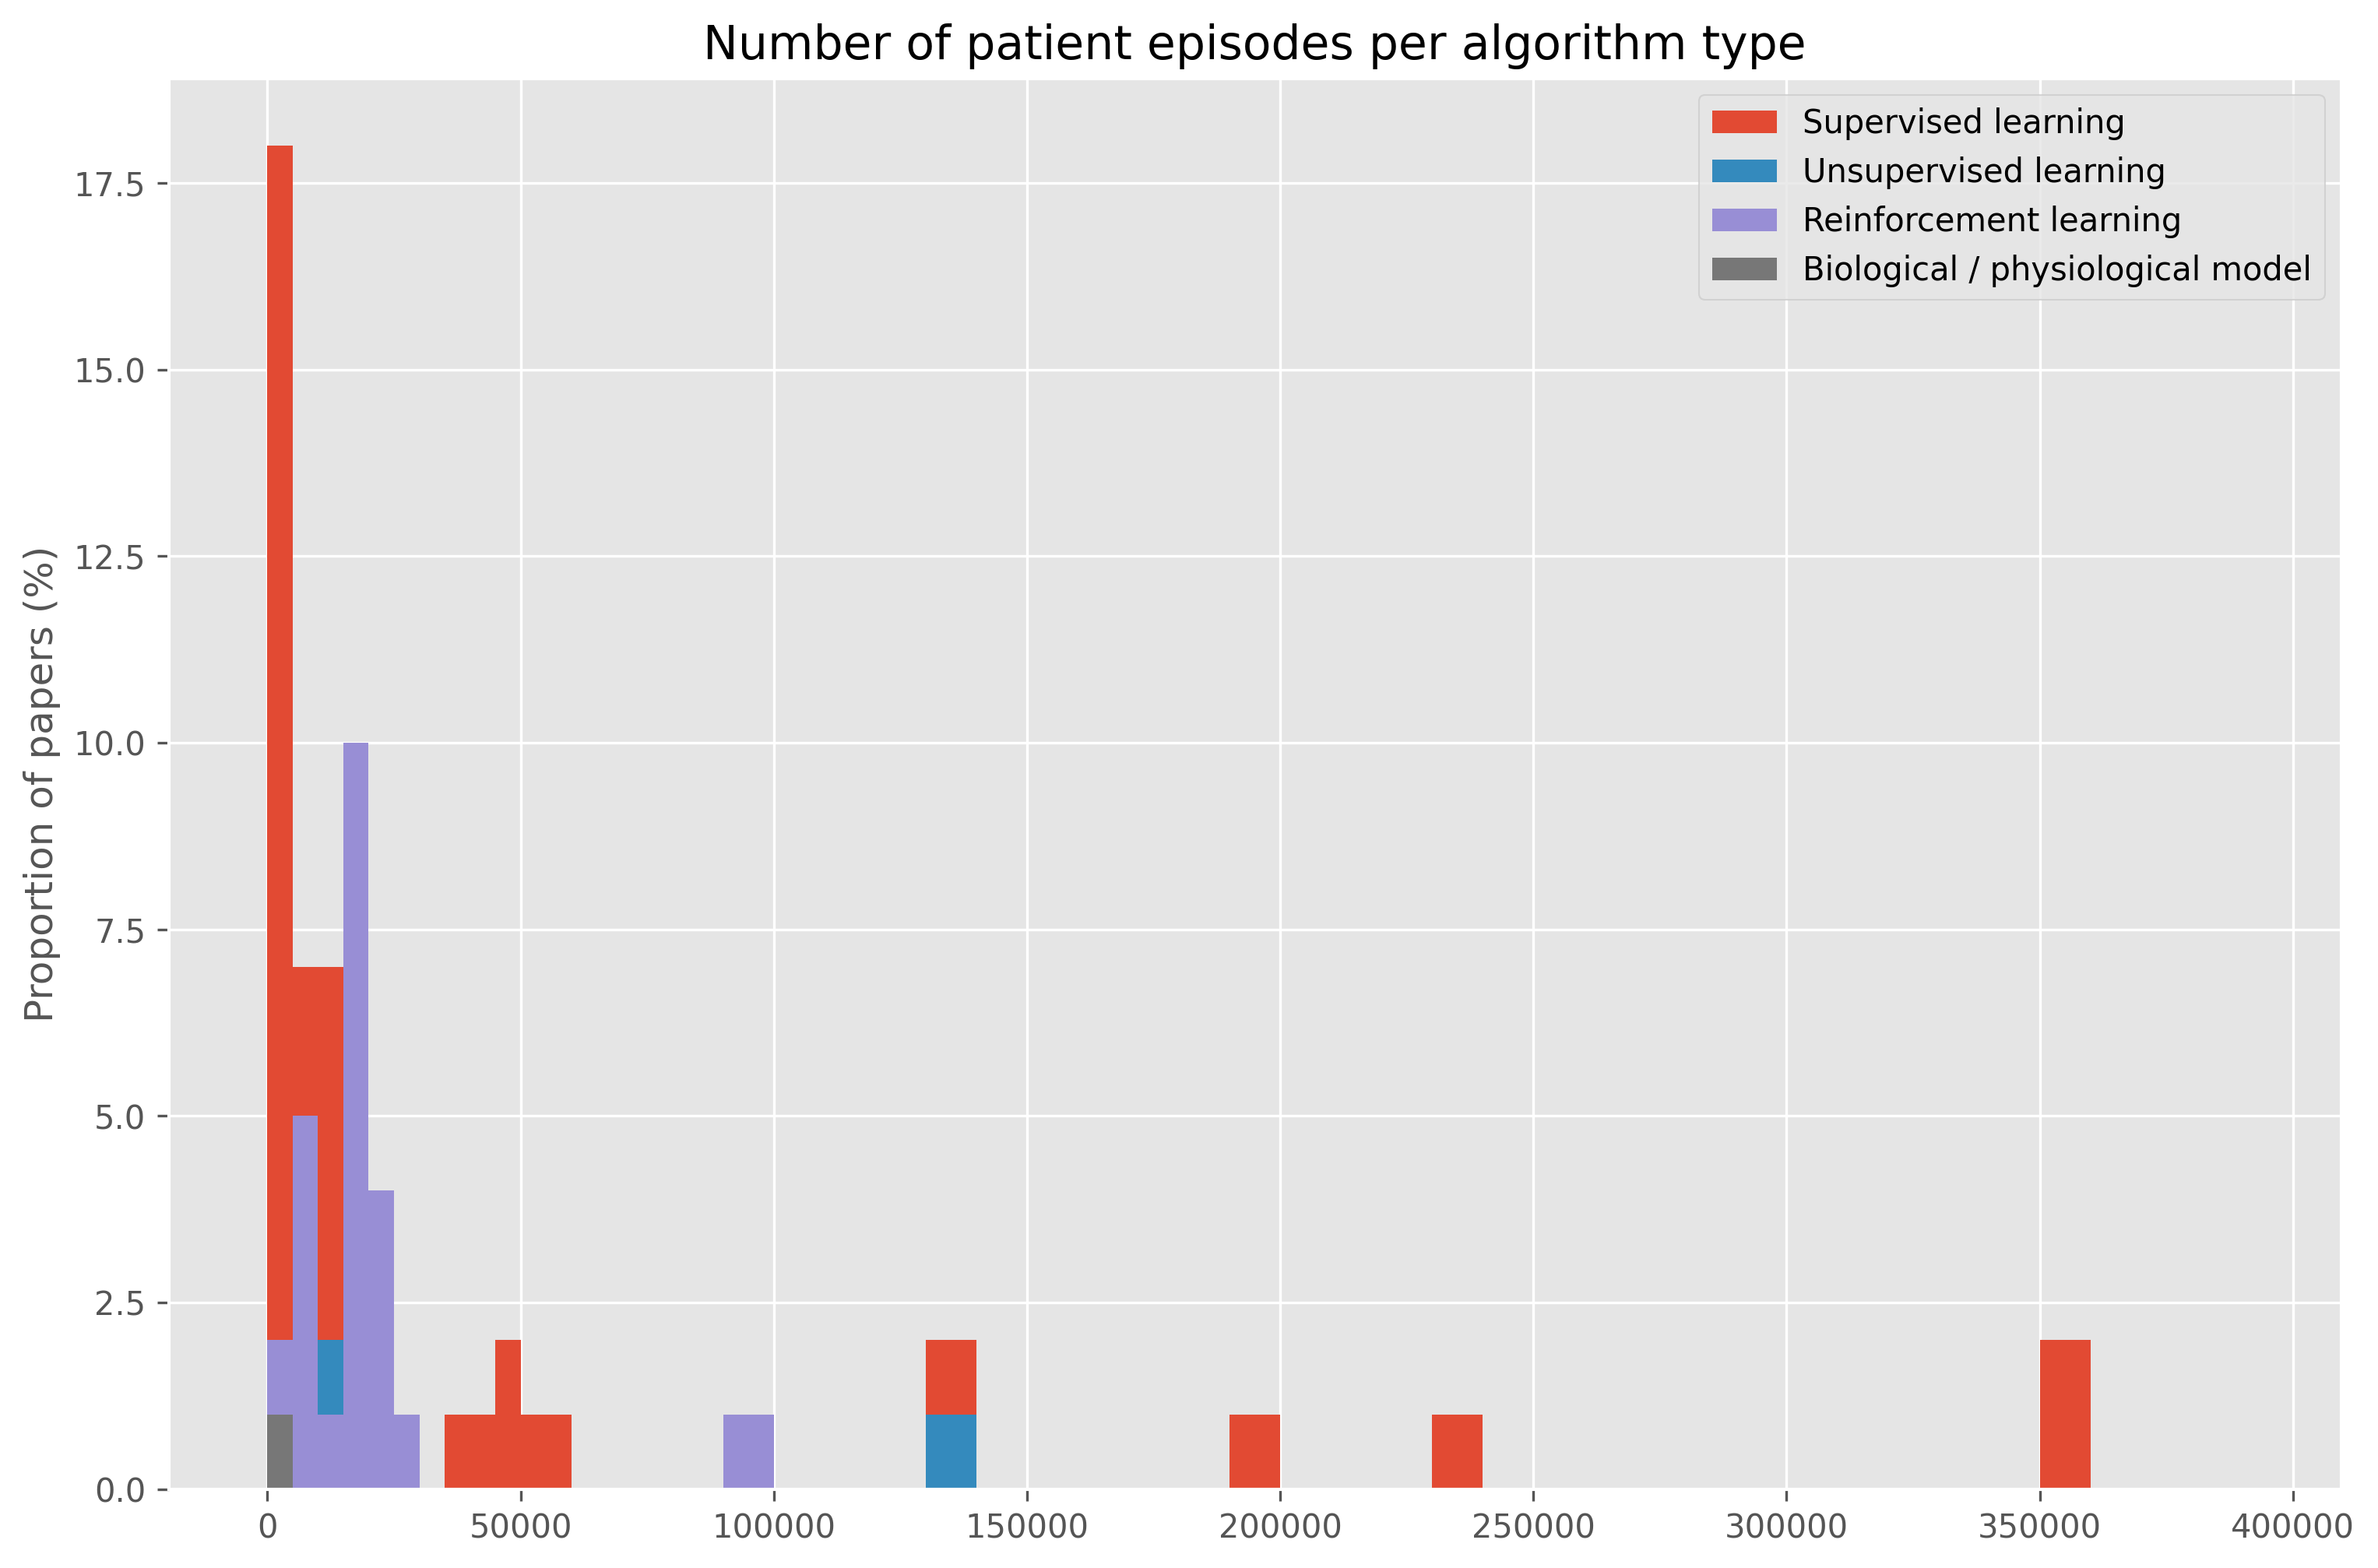

In [17]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
for ai_type in learning_types:
    papers_df[papers_df[ai_type] & papers_df[EPISODES_SPECIFIED]][N_EPISODES].apply(lambda x: x.replace(",", "")).astype("int").hist(bins=bins, label=ai_type)
plt.title("Number of patient episodes per algorithm type")
plt.ylabel("Proportion of papers (%)")
plt.legend()
plt.savefig(os.path.join("out", f"Number of episodes VS type - hist.png"))
plt.show()

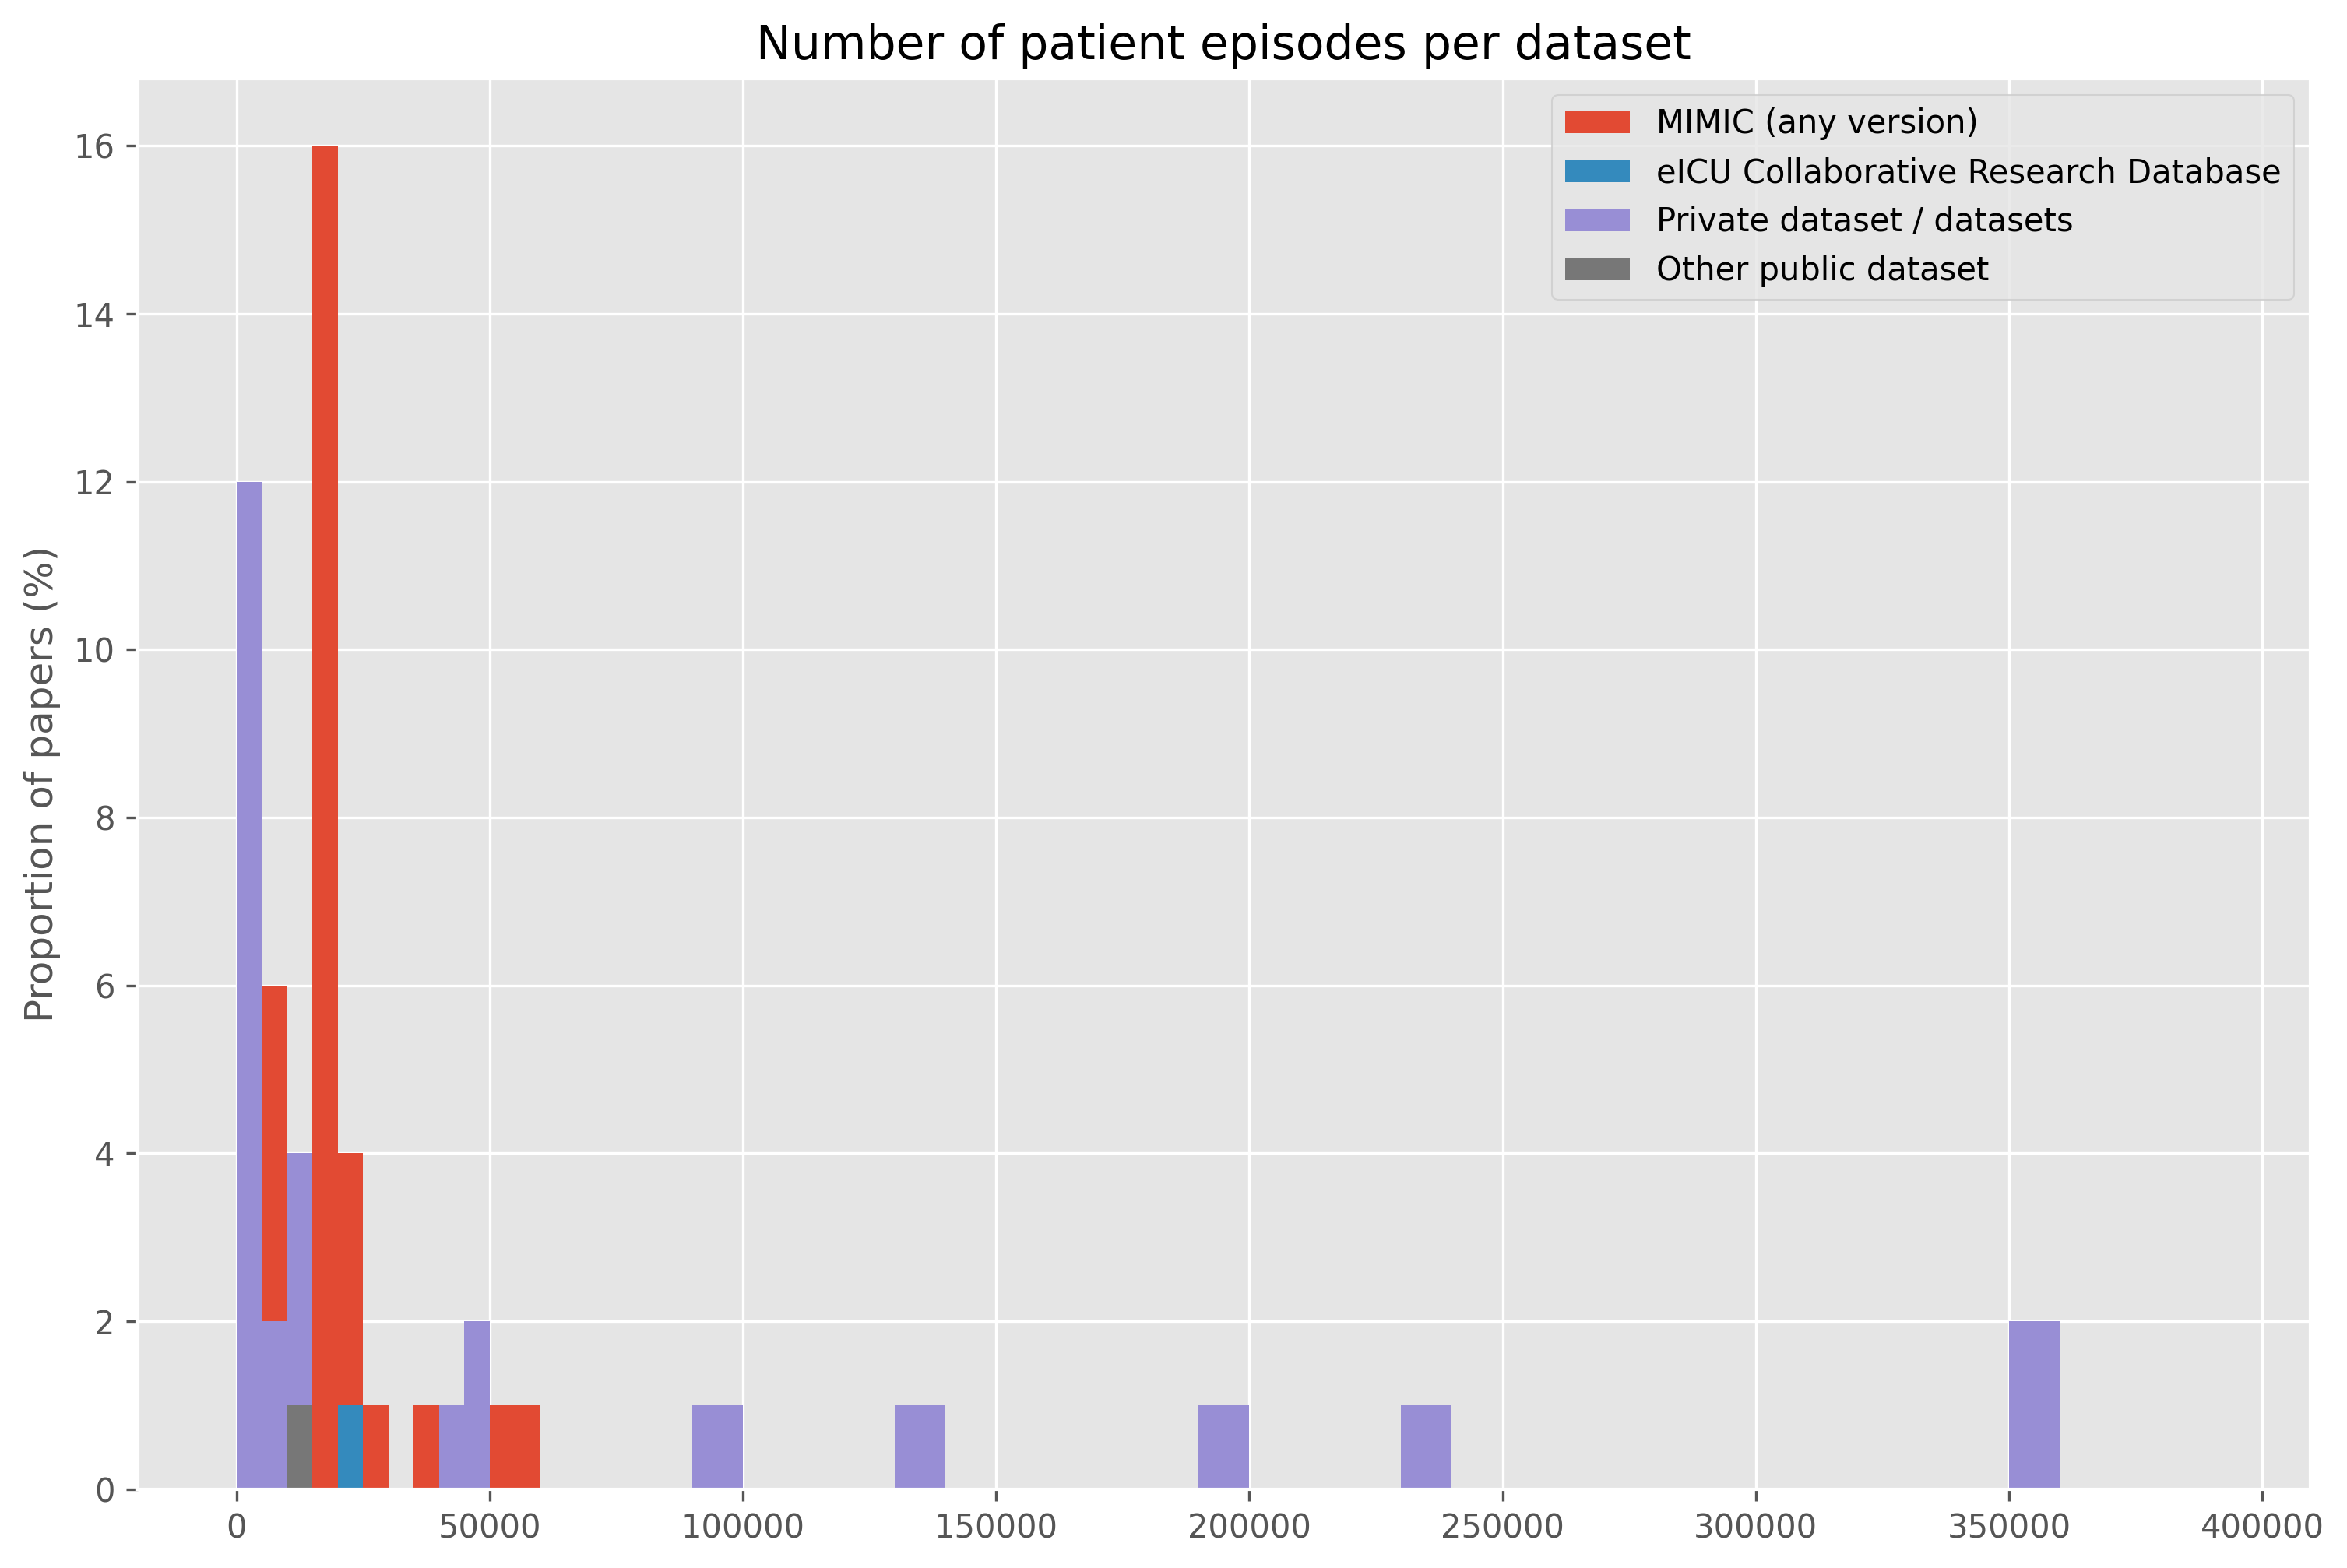

In [18]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
for dataset in dataset_cols:
    papers_df[papers_df[dataset] & papers_df[EPISODES_SPECIFIED]][N_EPISODES].apply(lambda x: x.replace(",", "")).astype("int").hist(bins=bins, label=dataset)
plt.title("Number of patient episodes per dataset")
plt.ylabel("Proportion of papers (%)")
plt.legend()
plt.savefig(os.path.join("out", f"Number of episodes VS type - hist.png"))
plt.show()

# Type of algorithm

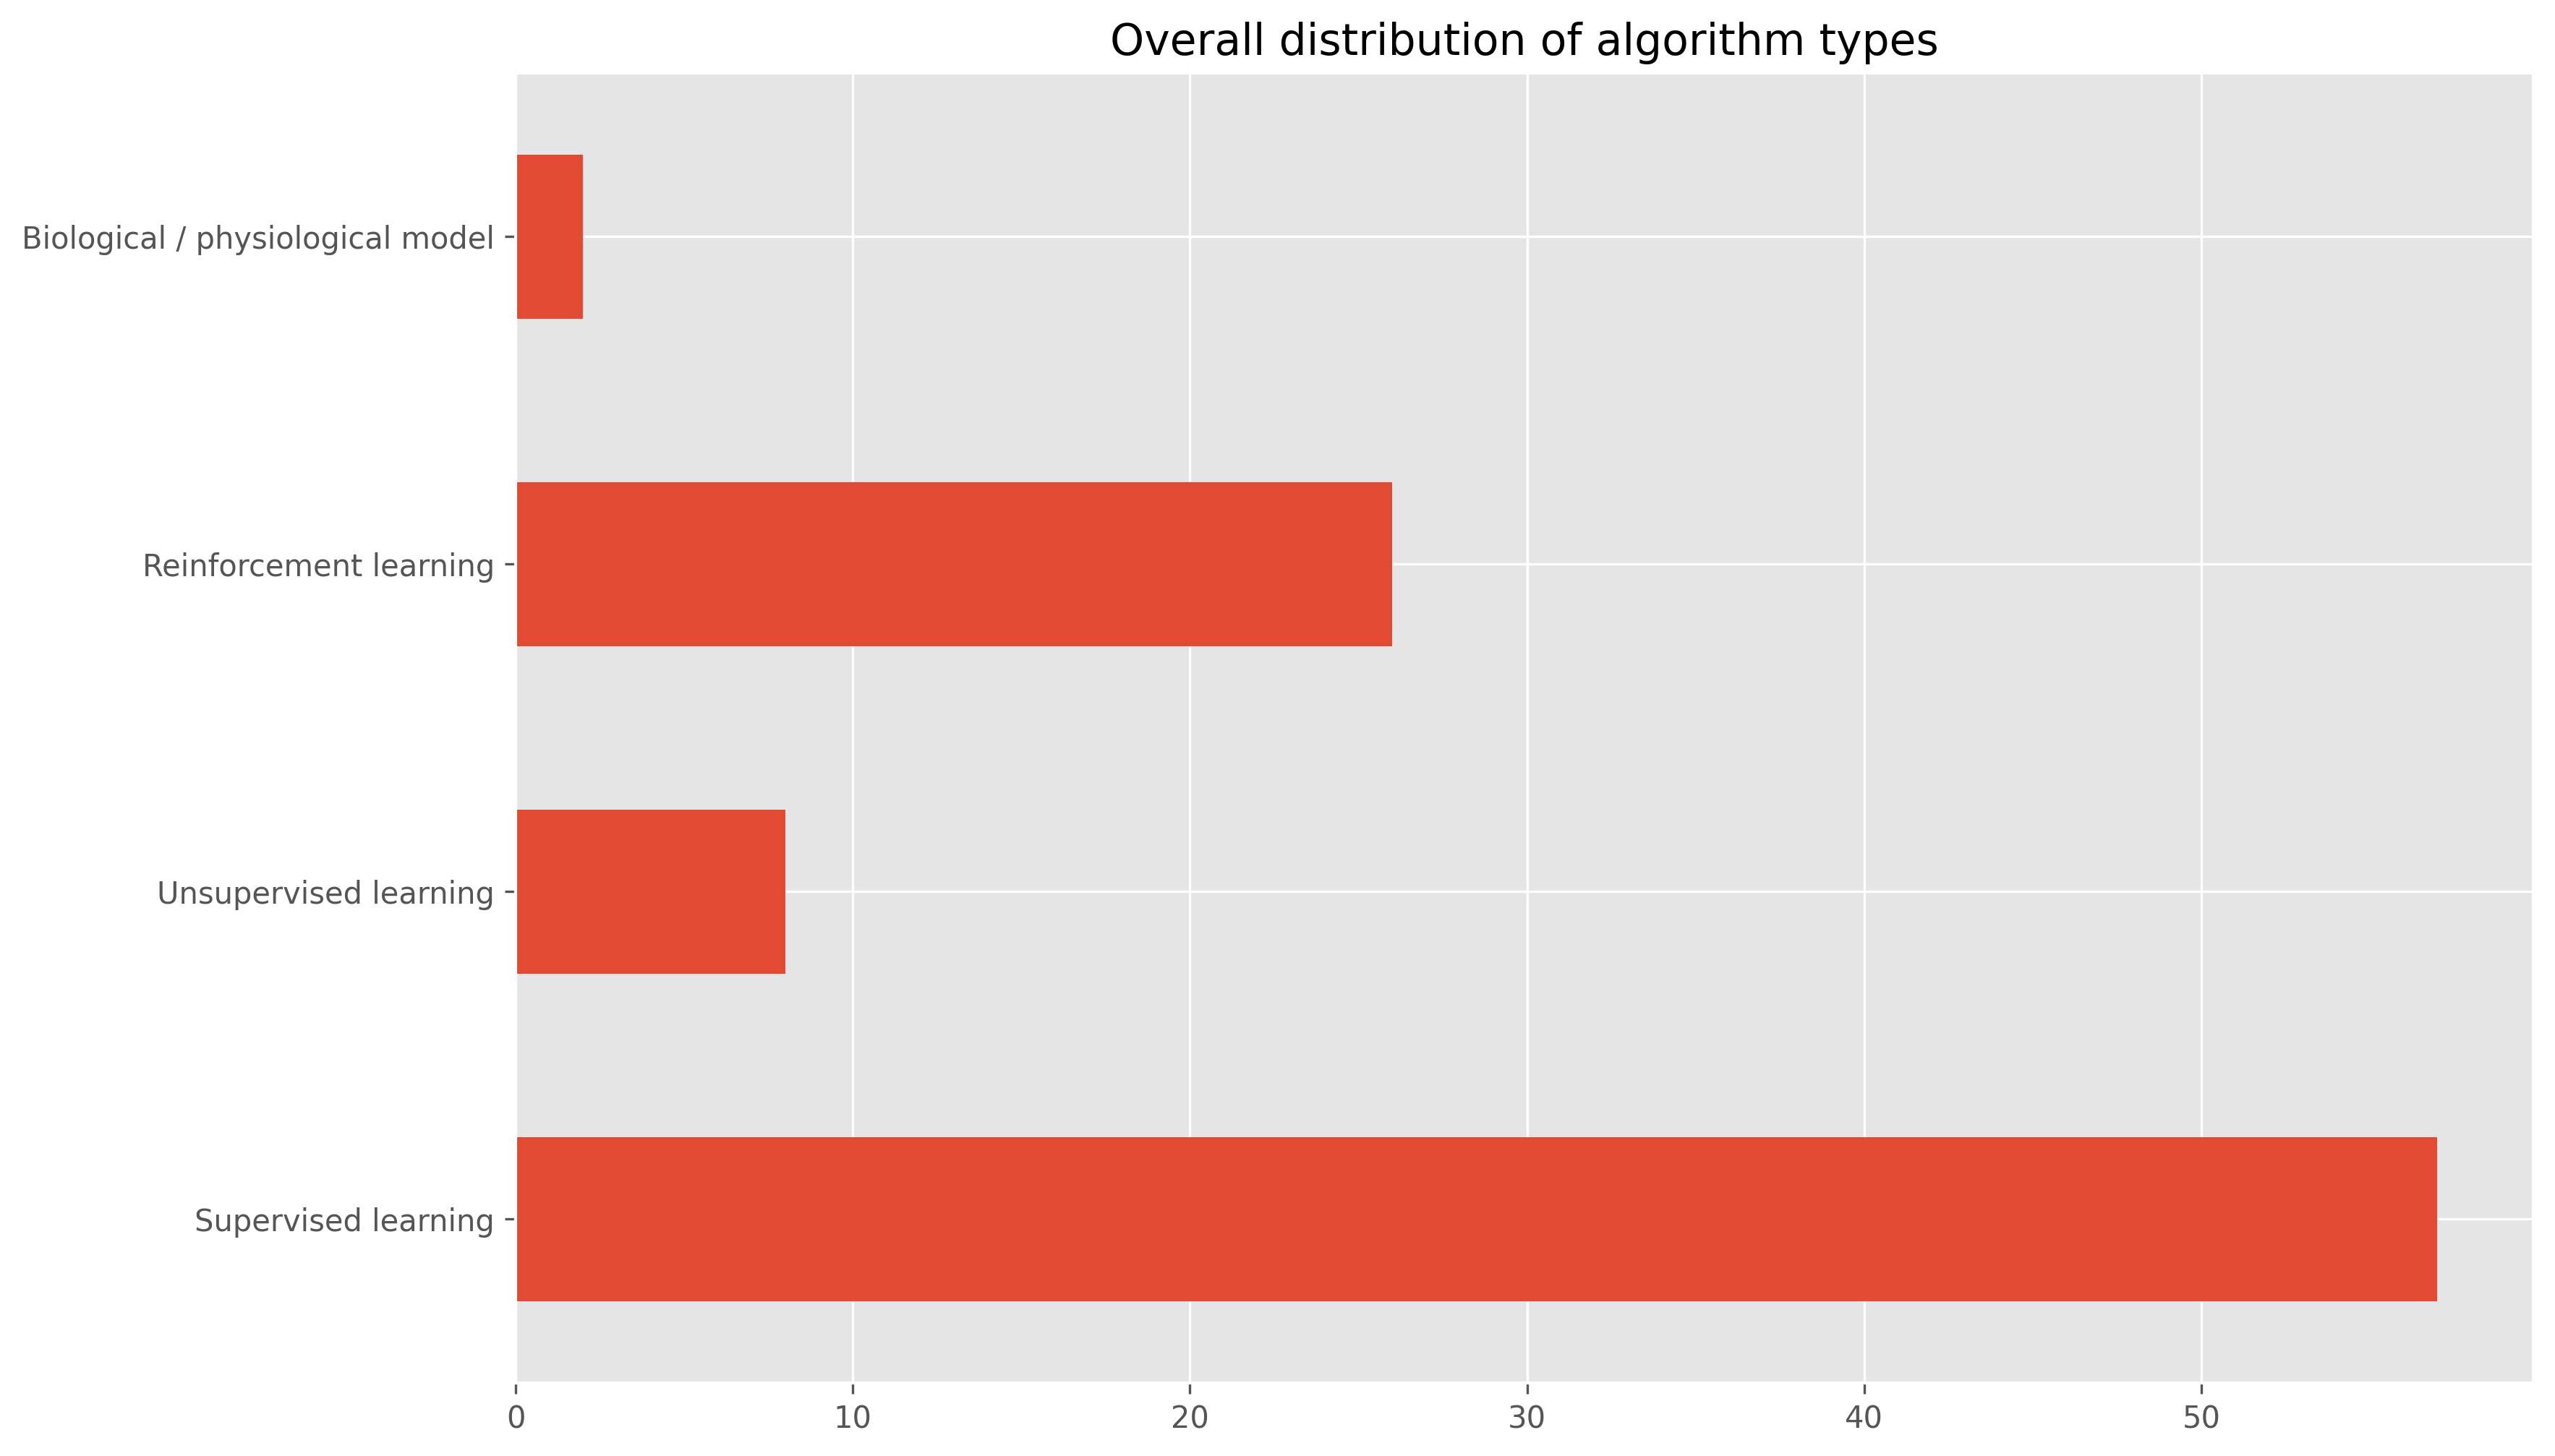

In [19]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
papers_df[learning_types].sum().plot.barh()
plt.title("Overall distribution of algorithm types")
plt.savefig(os.path.join("out", f"Algorithm - pie.png"))
plt.show()

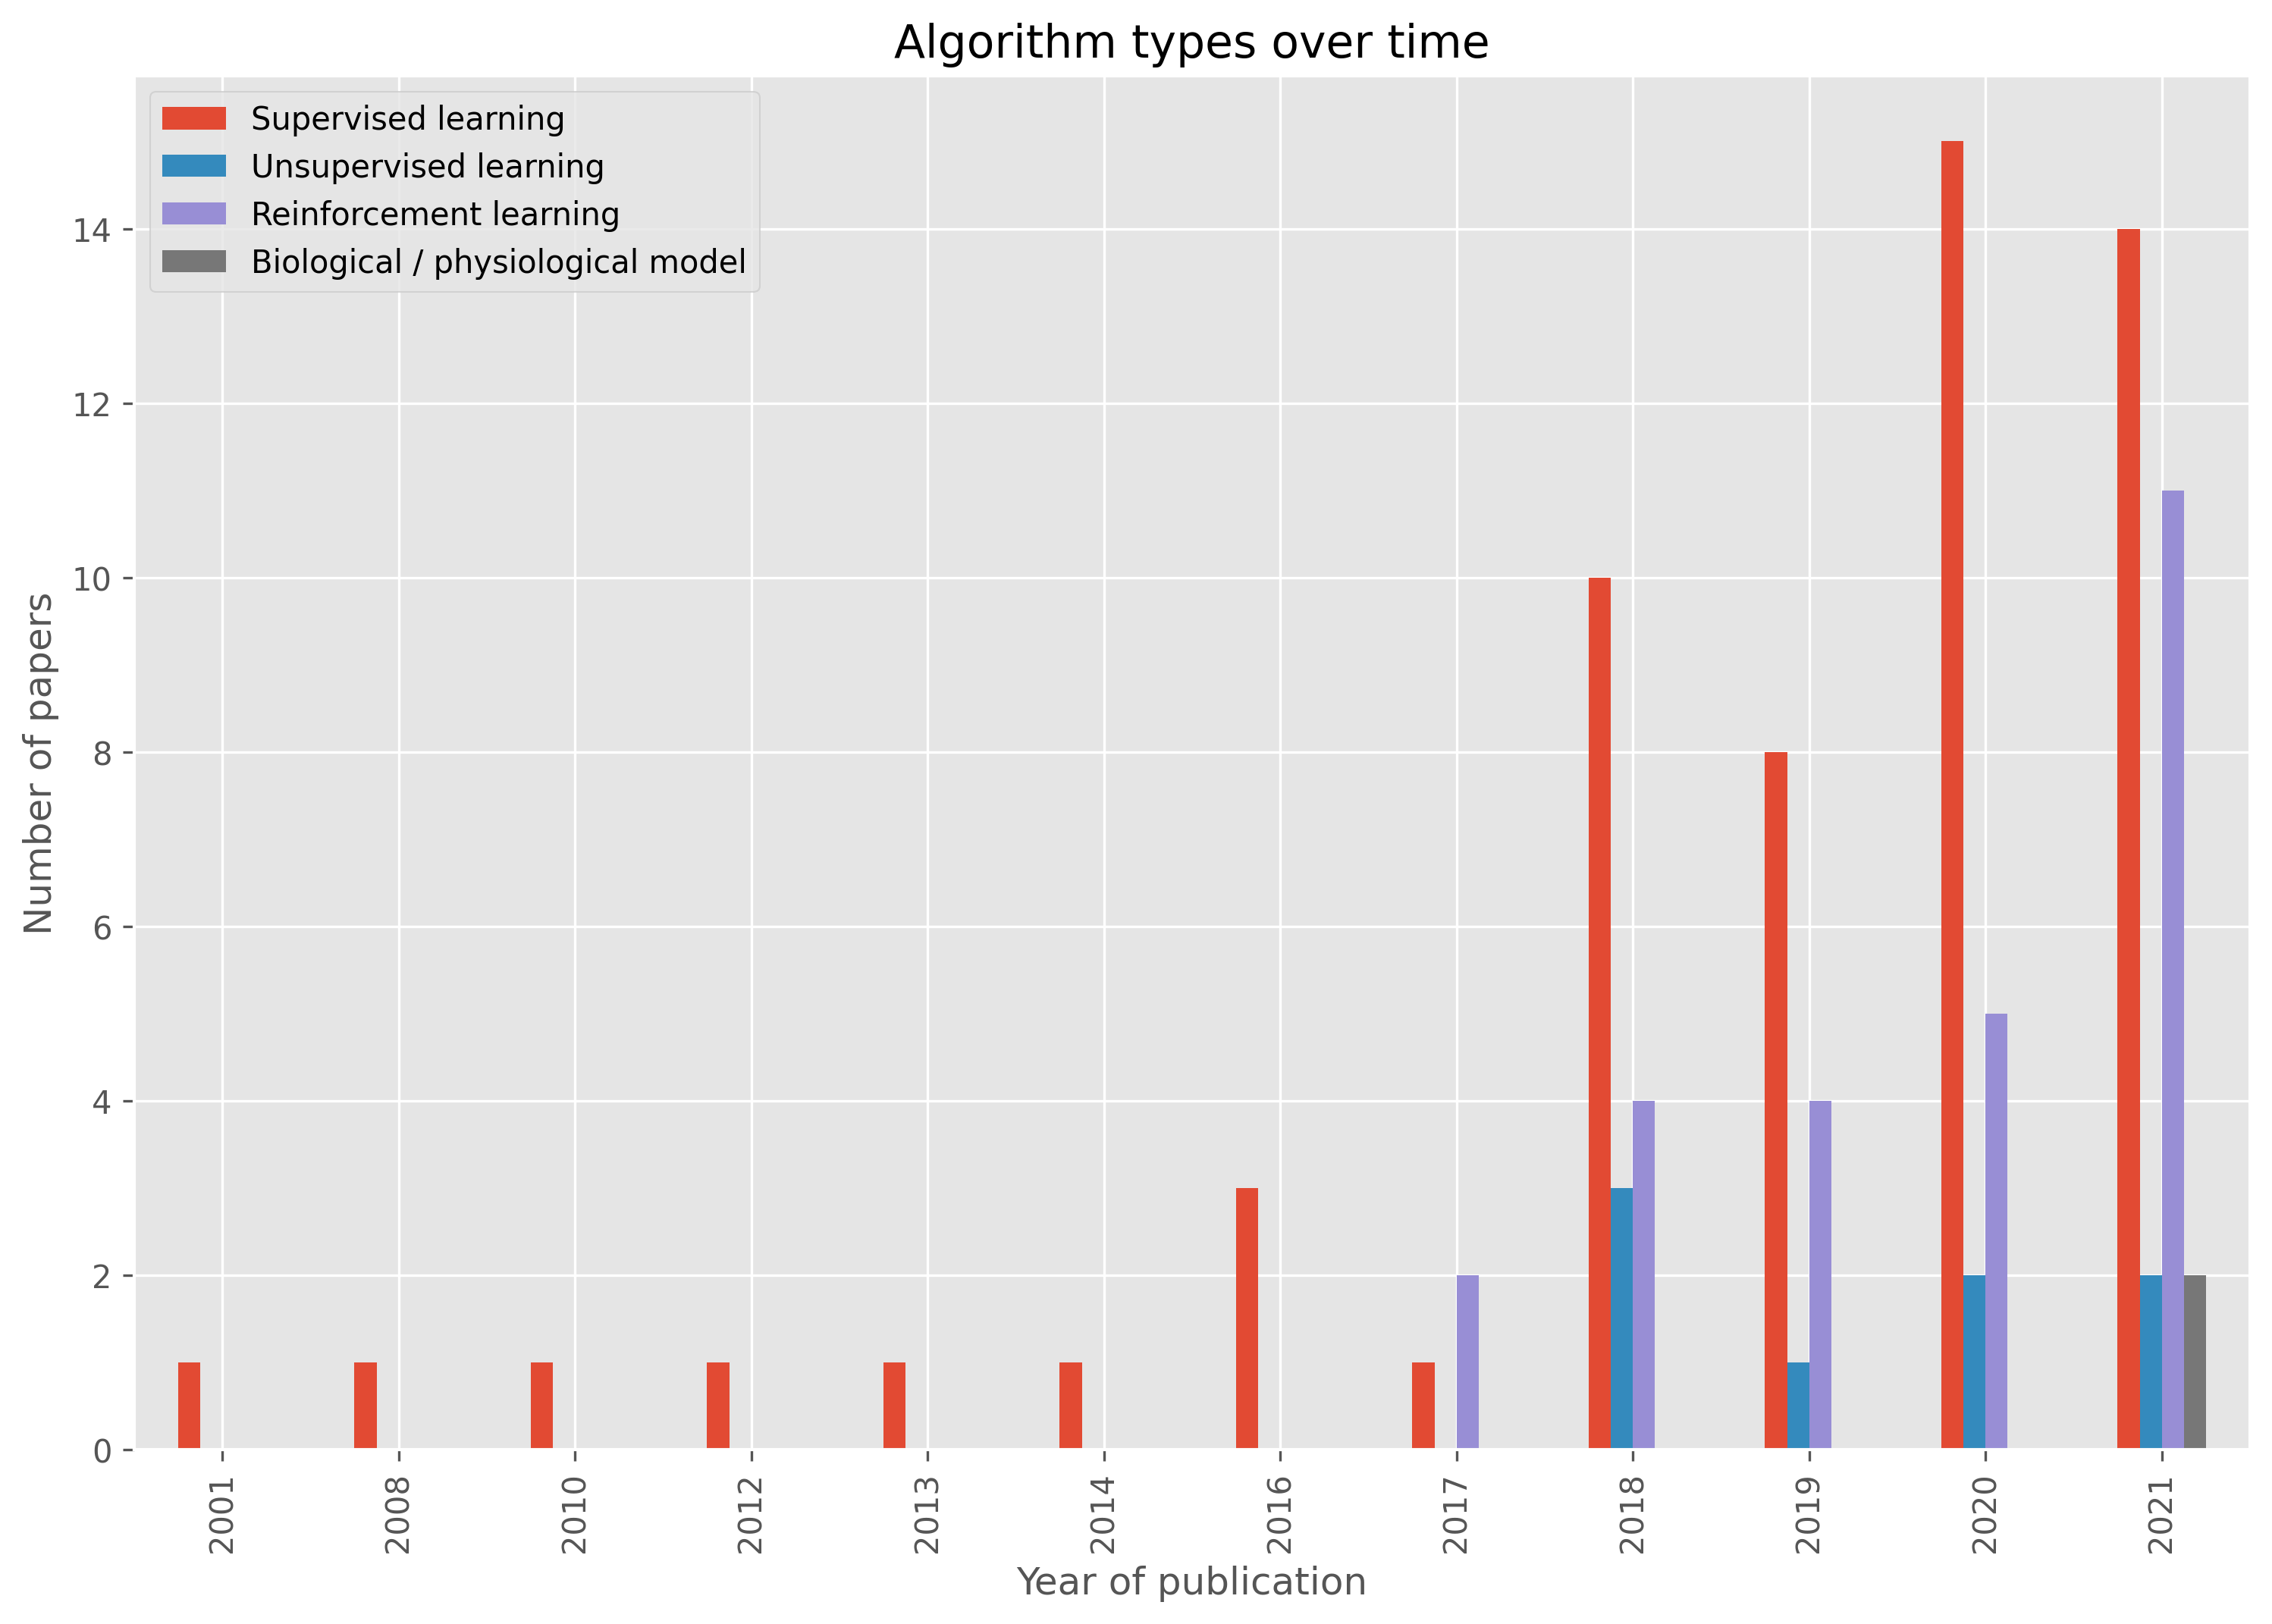

In [54]:
papers_df.groupby("Year of publication")[learning_types].sum().plot.bar()
plt.title("Algorithm types over time")
plt.ylabel("Number of papers")
plt.savefig(os.path.join("out", f"Algorithm - VS time.png"))
plt.show()

Observations:
 - Superviser learning is still the most used method, possibly with the task of mortality.shock prediction
 - Reinforcement Learning has been on the rise since 2017, now representing almost as many papers as superviser learning
 - Ohysiological models are a new player in the field

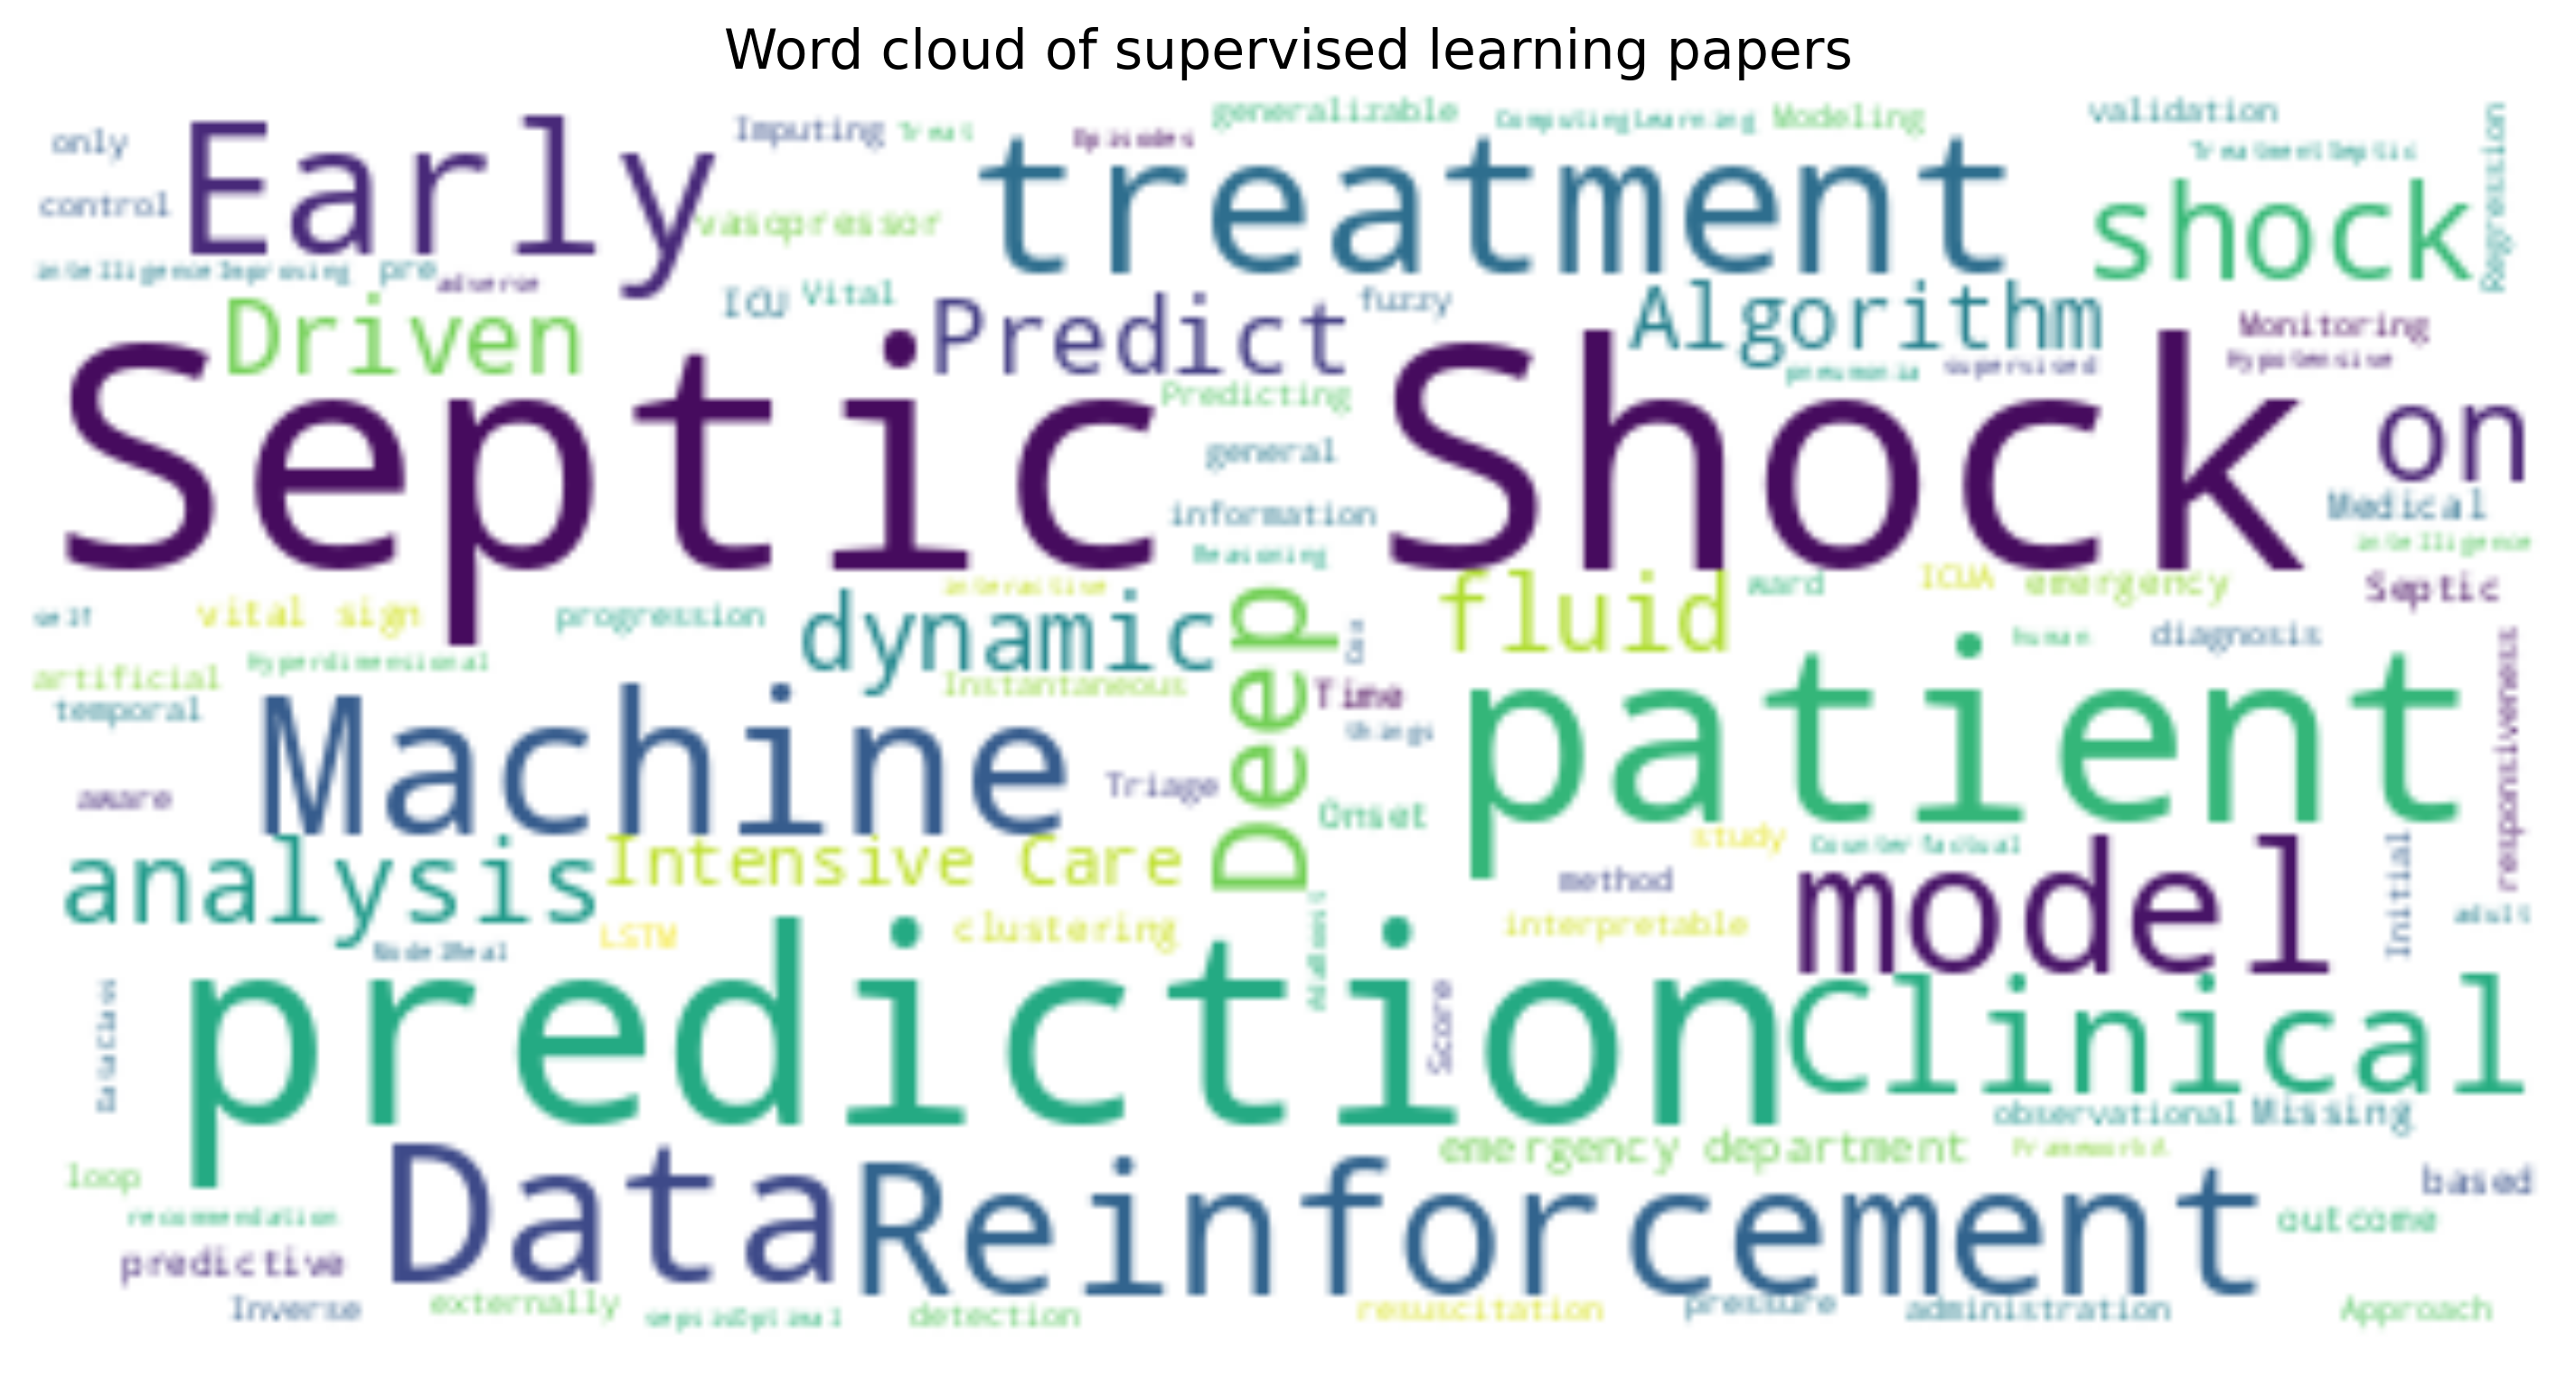

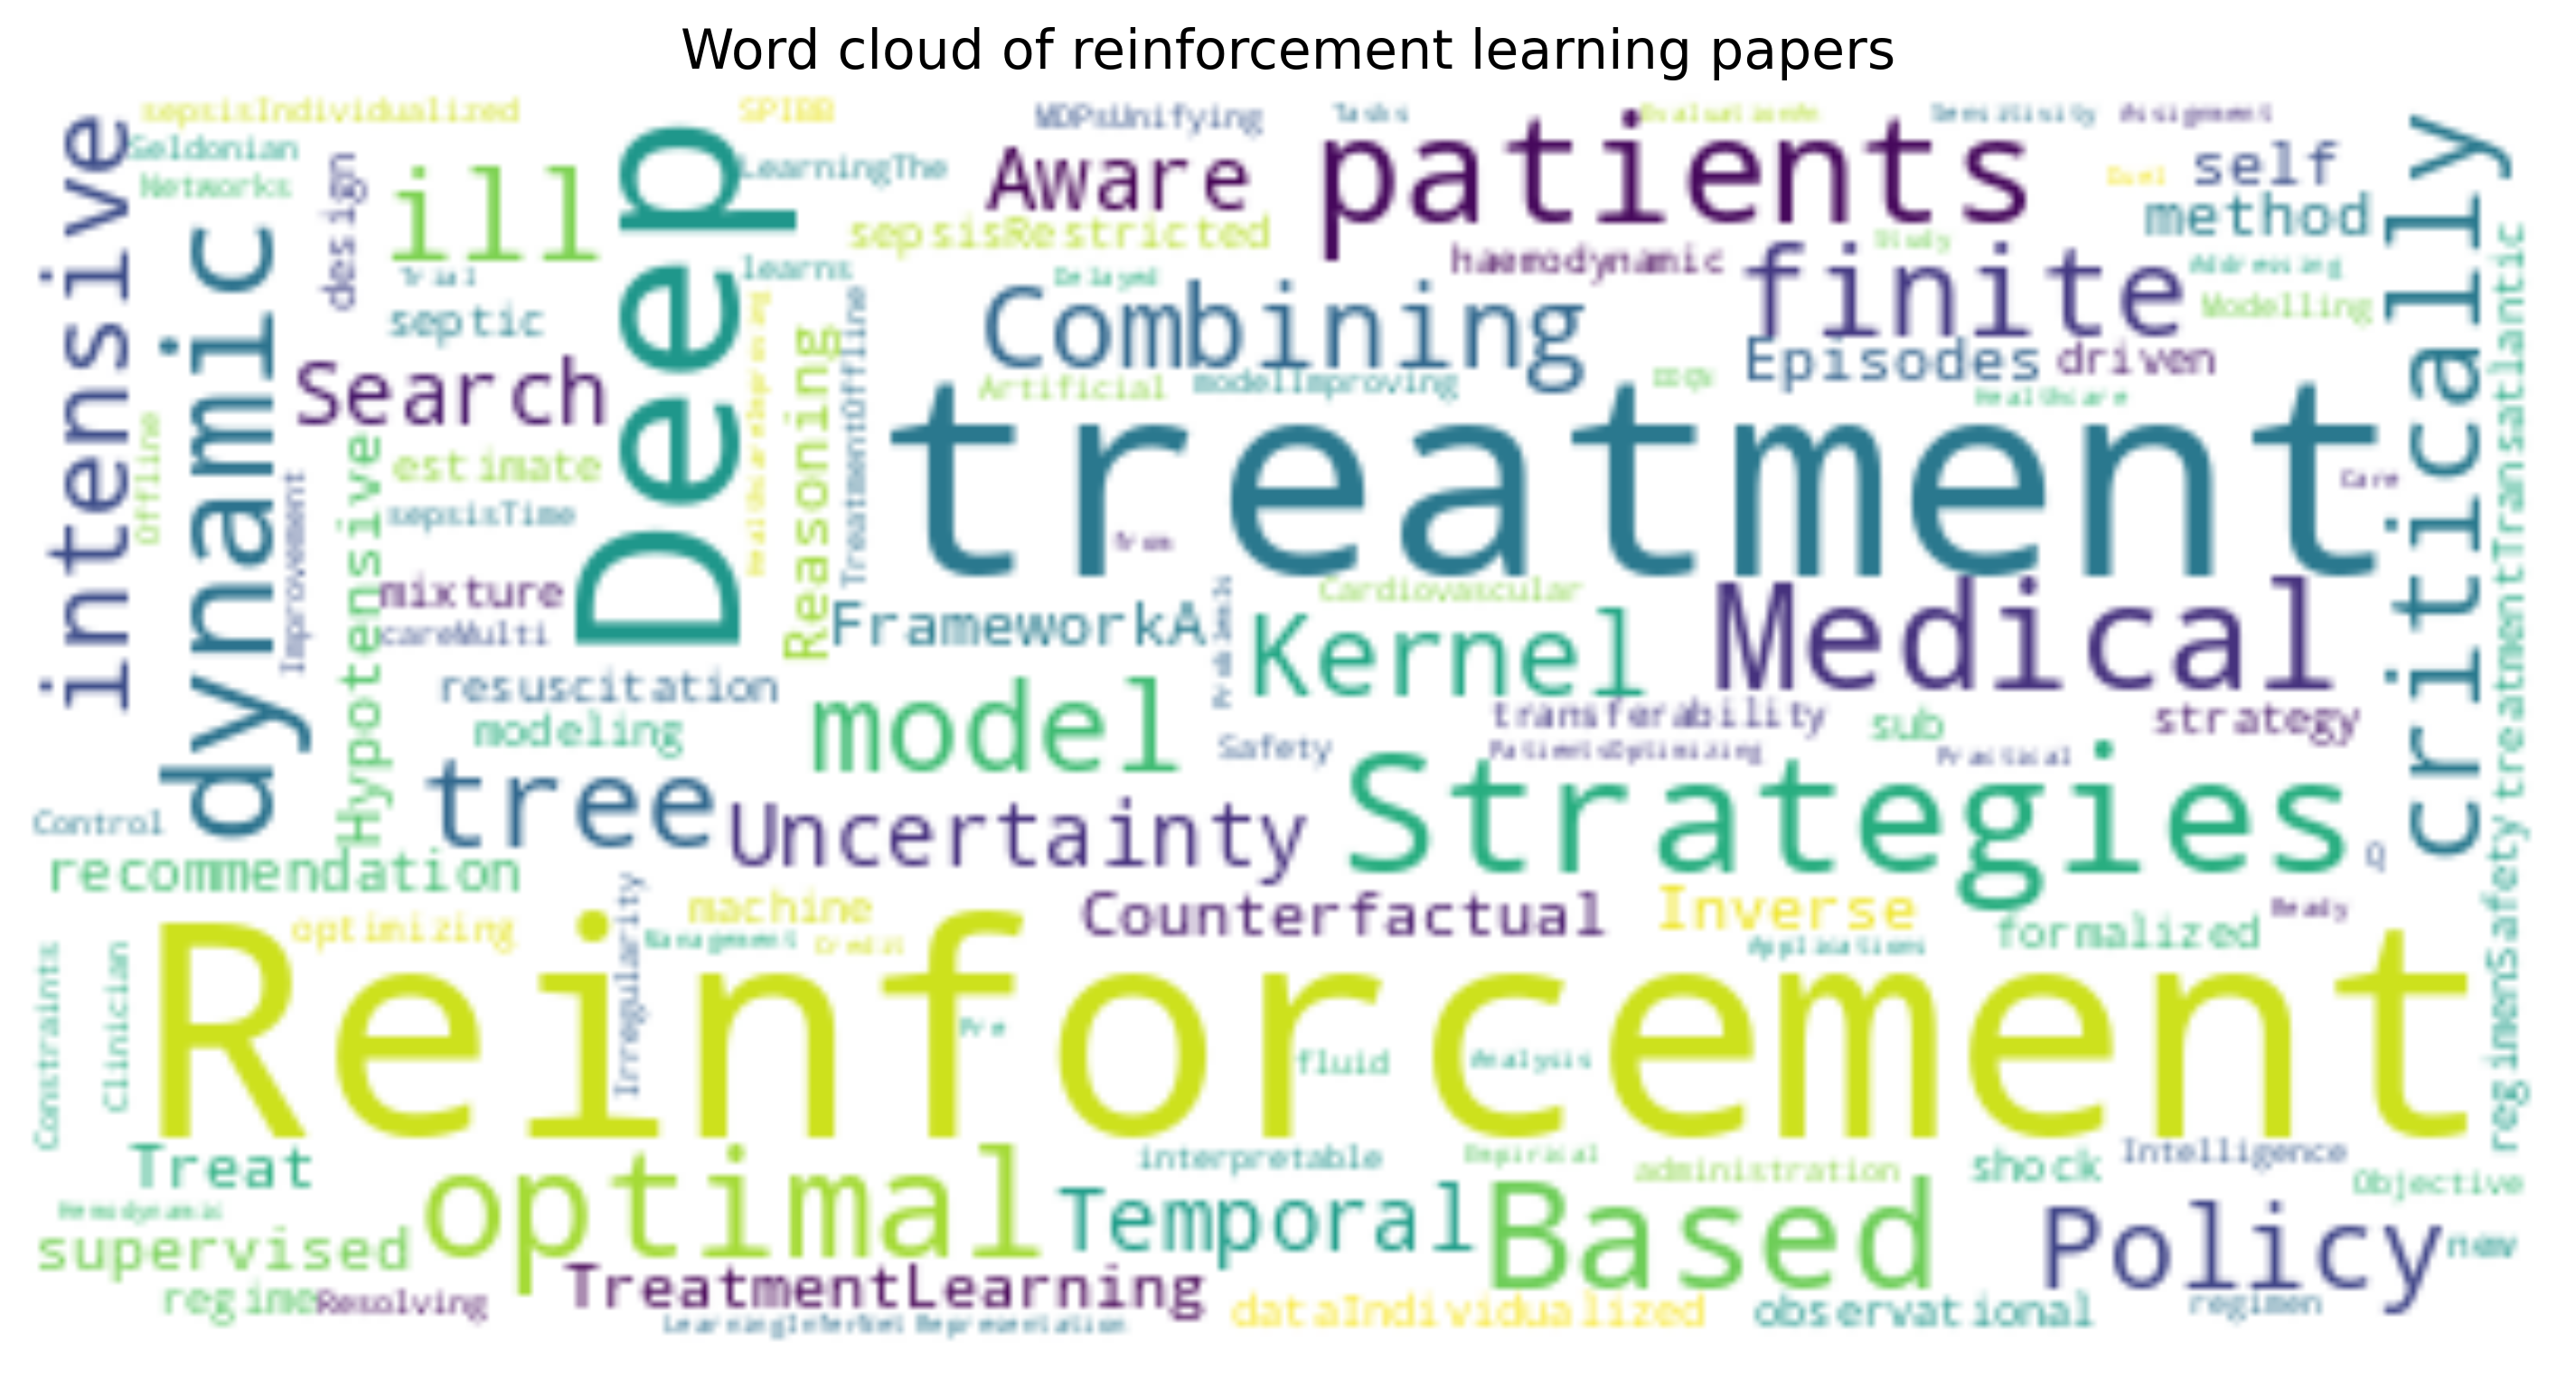

In [52]:
stopwords = ["sepsis", "learning"] + "for of if and the in obn by with using a to an".split(" ")
for learning_type in learning_types:
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords
    ).generate(
        papers_df[papers_df[learning_type]]["Title"].str.cat(),
    )
    if learning_type in ["Supervised learning", "Reinforcement learning"]:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word cloud of {learning_type.lower()} papers")
        plt.show()
    if learning_type == "Biological / physiological model": learning_type = "Physiological models"
    wordcloud.to_file(os.path.join("out", f"Algorithm - cloud {learning_type}.png"))

Observations:
 - Supervised learning Focus more on septic shoch prediction where RL papers have a bigger interest on treatment
 - The word "Reinforcement"appears in the supervised cloud --> supervised learning is sometimes part of a bigger RL agent

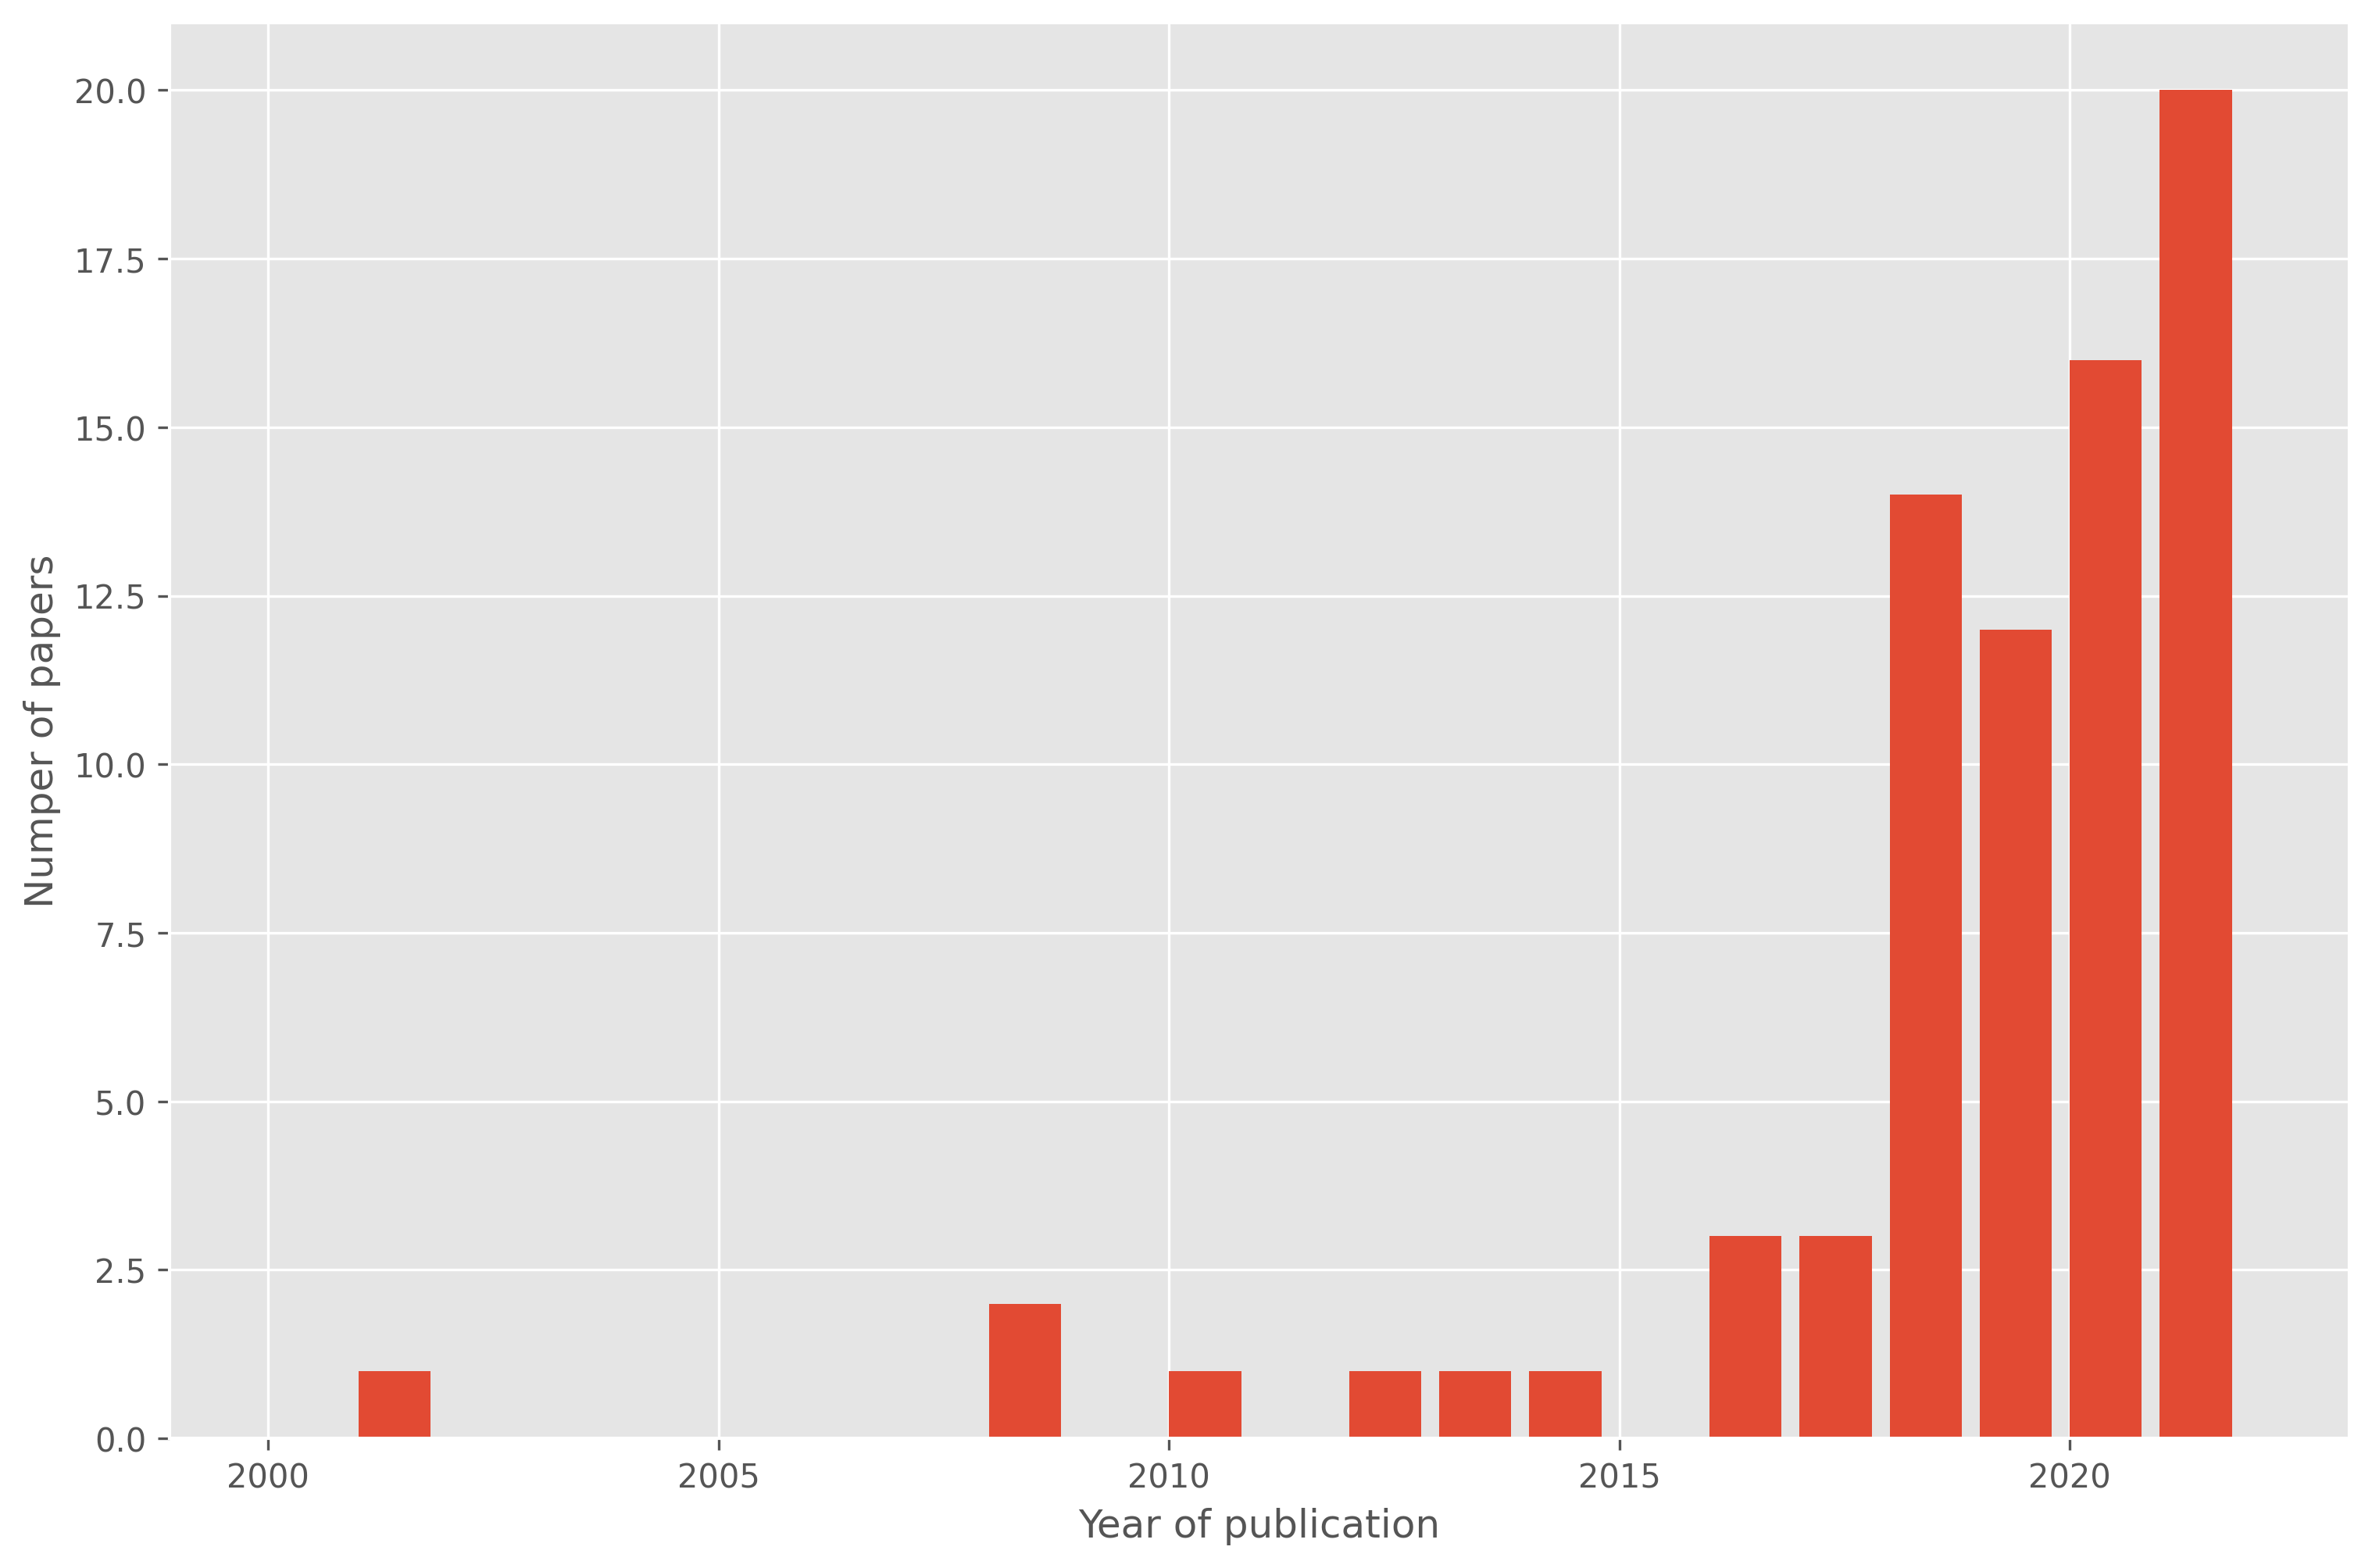

In [47]:
year_bins = list(range(2000, 2023, 1))
papers_df["Year of publication"].plot.hist(bins=year_bins, width=0.8)
plt.xlabel("Year of publication")
plt.ylabel("Numper of papers")
plt.savefig(os.path.join("out", f"Overall - papers VS time.png"))
plt.show()

In [26]:
YEAR = "Year of publication"
VAL_TYPE = "validation"
validation_stages = [
    "Internal validation",
    "External retrospective validation (other hospitals)",
    "External retrospective validation (separate dataset)",
    "Prospective observational validation",
    "Non-randomised interventional validation (clinical trial)",
    "Randomised interventional validation (clinical trial)",
    "Regulatory approval",
    "Post-deployment surveillance"
]

tmp_df = papers_df.copy()
tmp_df[VAL_TYPE] = [None for itr in range(len(papers_df))]
for row_idx in range(tmp_df.shape[0]):
    for val_stage in validation_stages:
        if tmp_df[val_stage][row_idx]:
            tmp_df[VAL_TYPE][row_idx] = val_stage

tmp_df[VAL_TYPE]

/var/folders/v4/n34rwj8d0058gx0z146rlrq00000gn/T/ipykernel_3653/3916453645.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df[VAL_TYPE][row_idx] = val_stage


0     Internal validation
1     Internal validation
2                    None
3     Internal validation
4     Internal validation
             ...         
70    Internal validation
71    Internal validation
72    Internal validation
73    Internal validation
74    Internal validation
Name: validation, Length: 75, dtype: object

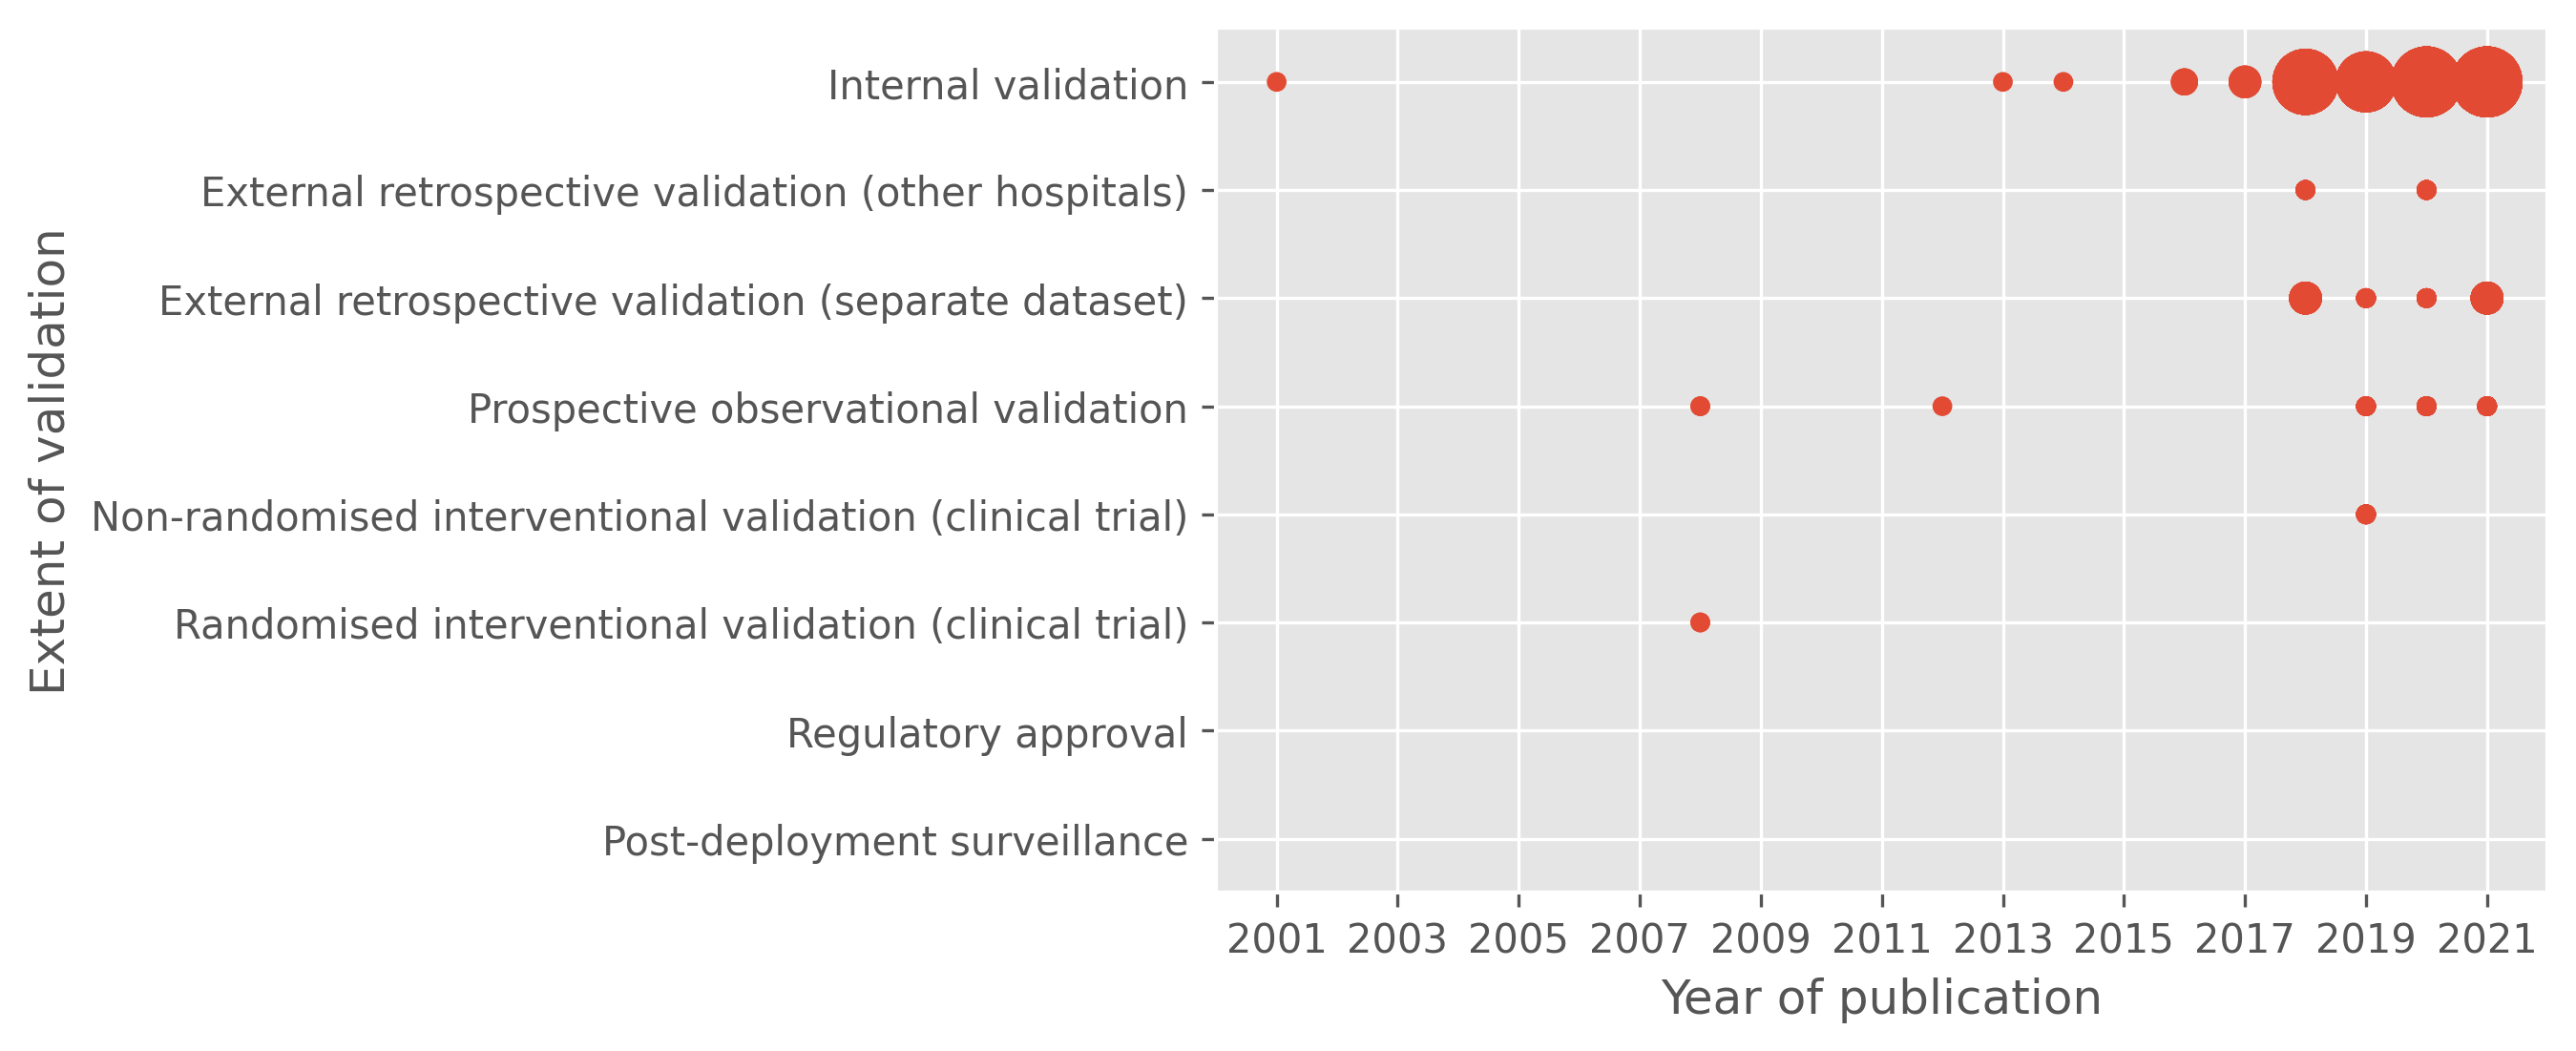

In [48]:
def get_papers_in_year_and_val(year, val):
    return tmp_df[(tmp_df[YEAR] == year) & (tmp_df[val])].shape[0]

#for year in tmp_df[YEAR].unique():
#    for val in validation_stages:
#        print(year, val, get_papers_in_year_and_val(year, val))

def get_scatter_xyr(year, val):
    x = year - tmp_df[YEAR].min()
    y = validation_stages.index(val)
    r = tmp_df[(tmp_df[YEAR] == year) & (tmp_df[val])].shape[0]
    return x, y, r

xs, ys, rs = [], [], []
for year in tmp_df[YEAR]:
    for val in validation_stages:
        x, y, r = get_scatter_xyr(year, val)
        xs.append(x)
        ys.append(y)
        rs.append(r*20)
        
plt.rcParams["figure.figsize"] = (6, 4)  # Defuault: (6, 4)

plt.scatter(xs, ys, rs)
plt.xticks(list(range(0, 21, 2)), list(range(2001, 2022, 2)))
plt.yticks(list(range(len(validation_stages))), validation_stages)
plt.xlabel("Year of publication")
plt.ylabel("Extent of validation")
plt.ylim(-0.5, 7.5)
plt.gca().invert_yaxis()
plt.show()